In [468]:
import numpy as np
import pandas as pd

import numpy as np
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트


import matplotlib.pyplot as plt # 그래프 시각화
import seaborn as sns # 그래프 시각화
from sklearn.preprocessing import LabelEncoder # 라벨 인코더
from google.colab import files 
from datetime import datetime
from scipy import stats

In [469]:
train = files.upload()

Saving train.csv to train (3).csv


In [661]:
train = pd.read_csv('train.csv')
train.tail()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,743942102.0,187576102.0,0.0,5.943868e+08,2.776603e+09,2.769516e+09,1.797116e+09,7086391.0,1.191266e+10,1.171868e+10,119856720.0,0.0,8.715369e+09,1.520004e+09,0.0,7.195366e+09,5.930000e+09,5.973889e+09,1.406028e+09,7.068816e+09,4.057855e+08,6.755147e+09,3.768952e+09,90318167.0,2.090078e+08,196659822.0,51608640.0,-2.624151e+08,2.550562e+09,2.542336e+09,1.962693e+09,8225698.0,1.225271e+10,1.210466e+10,76856720.0,0.0,9.423771e+09,2.618201e+09,0.0,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,139851326.0,129697525.0,0.0,-1.622521e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,7.500000e+06,121022160.0,137980960.0,137980960.0,0.0,-7.175308e+07,3.867238e+09,3.867238e+09,1.132312e+09,0.0,5.569636e+09,5.419756e+09,67957340.0,0.0,6.249466e+09,2.050342e+09,0.0,4.199124e+09,2.498749e+09,3.187408e+09,0.000000e+00,3.132198e+09,2.971193e+09,3.529793e+08,1.479400e+08,173212032.0,1.330644e+08,107972617.0,0.0,-1.518272e+08,4.074622e+09,4.069797e+09,1.132312e+09,4825310.0,5.554636e+09,5.419756e+09,52957340.0,0.0,6.370097e+09,2.170973e+09,0.0,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,536691924.0,514368798.0,0.0,-1.850554e+09,4.929370e+09,4.910840e+09,2.834734e+07,18529330.0,1.196624e+10,4.441451e+09,0.0,73742310.0,5.804268e+08,7.507060e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.096872e+09,4.861985e+08,4.750651e+09,2.896997e+09,10545075.0,1.600243e+09,746156653.0,0.0,-2.729675e+09,5.896047e+09,5.840526e+09,2.526034e+07,55521367.0,1.197633e+10,4.441451e+09,0.0,65242310.0,6.392336e+08,6.400000e+09,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN
300,428,open,seoul,79,20011017,NaN,traditional_hospital,1.340971e+09,8.108450e+08,5.043409e+08,1.318978e+08,2264007.0,73558495.0,73558495.0,0.0,-4.550929e+07,6.624176e+08,6.197801e+08,1.545963e+07,42637474.0,1.024680e+10,1.011968e+10,86930500.0,0.0,5.418547e+09,3.187619e+09,0.0,2.230928e+09,2.190000e+09,5.490668e+09,6.269440e+09,1.499012e+09,8.328015e+08,5.254614e+08,1.333380e+08,4301929.0,9.439391e+07,94355280.0,0.0,5.065703e+07,4.969613e+08,4.526867e+08,1.545534e+07,44274527.0,1.038822e+10,1.026110e+10,86930500.0,0.0,5.349000e+09,3.123072e+09,0.0,2.225928e+09,2.190000e+09,5.536178e+09,6.269440e+09,15.0,15.0,same


In [229]:
test = files.upload()

Saving test.csv to test (2).csv


In [662]:
test = pd.read_csv('test.csv')
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,76680000.0,5.036692e+08,2.591385e+10,2.438741e+10,7.242580e+08,1.526434e+09,4.807282e+10,4.629931e+10,7.463122e+08,0.0,6.769090e+10,5.426088e+10,3.805927e+10,1.343002e+10,6.319097e+09,6.295769e+09,8.944587e+09,6.360375e+10,0.000000e+00,6.261126e+10,3.016946e+10,4.076448e+09,4.332357e+09,1.578626e+09,218399804.0,5.181821e+08,2.498992e+10,2.367928e+10,1.237754e+09,1.310637e+09,4.650191e+10,4.356296e+10,796386240.0,0.0,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,0.0,4.525557e+08,5.861727e+09,5.372198e+09,6.610290e+08,4.895291e+08,7.511010e+10,6.678648e+10,4.500000e+06,0.0,6.626737e+10,4.210945e+10,2.330000e+10,2.415791e+10,1.720000e+10,1.470447e+10,1.046277e+10,3.754253e+10,0.000000e+00,3.868523e+10,1.897732e+10,1.918022e+08,3.694365e+09,2.016114e+09,0.0,-4.645265e+09,5.503720e+09,4.943368e+09,1.544307e+08,5.603519e+08,6.559379e+10,6.545302e+10,14500000.0,0.0,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,0.0,-2.148749e+09,1.265313e+10,1.133922e+10,7.337107e+09,1.313914e+09,2.945467e+10,2.830632e+10,1.388070e+08,0.0,0.000000e+00,2.830632e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,2.468035e+10,1.500100e+09,2.373950e+10,1.191146e+10,2.361216e+08,1.328858e+09,6.259234e+08,15210270.0,-1.667198e+09,1.354202e+10,1.263851e+10,7.003703e+09,9.035036e+08,2.938810e+10,2.777589e+10,428850980.0,0.0,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,2.060989e+09,0.000000e+00,0.0,2.789663e+09,8.644533e+09,7.891338e+09,0.000000e+00,7.531944e+08,6.730264e+10,6.415297e+10,0.000000e+00,0.0,2.891880e+10,2.604193e+10,1.875187e+10,2.876879e+09,0.000000e+00,4.702837e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.975530e+09,2.112736e+09,0.000000e+00,0.0,2.862794e+09,1.204897e+10,1.126481e+10,0.000000e+00,7.841551e+08,3.920904e+10,3.601937e+10,0.0,0.0,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,0.000000e+00,2.573804e+09,0.0,3.346675e+09,7.849772e+09,7.138327e+09,1.104000e+08,7.114450e+08,6.404854e+10,6.024301e+10,3.582019e+09,0.0,4.921637e+10,2.503353e+10,1.720219e+10,2.418283e+10,9.976421e+09,2.268194e+10,1.492691e+10,4.348996e+10,0.000000e+00,4.067810e+10,1.871616e+10,1.802199e+09,0.000000e+00,3.925279e+09,0.0,4.614056e+09,8.847725e+09,7.868784e+09,1.764000e+08,9.789409e+08,6.085689e+10,6.014111e+10,546748880.0,0.0,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [663]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             301 non-null    int64  
 1   OC                  301 non-null    object 
 2   sido                301 non-null    object 
 3   sgg                 301 non-null    int64  
 4   openDate            301 non-null    int64  
 5   bedCount            296 non-null    float64
 6   instkind            300 non-null    object 
 7   revenue1            293 non-null    float64
 8   salescost1          293 non-null    float64
 9   sga1                293 non-null    float64
 10  salary1             293 non-null    float64
 11  noi1                293 non-null    float64
 12  noe1                293 non-null    float64
 13  interest1           293 non-null    float64
 14  ctax1               293 non-null    float64
 15  profit1             293 non-null    float64
 16  liquidAs

In [664]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             127 non-null    int64  
 1   OC                  0 non-null      float64
 2   sido                127 non-null    object 
 3   sgg                 127 non-null    int64  
 4   openDate            126 non-null    float64
 5   bedCount            119 non-null    float64
 6   instkind            125 non-null    object 
 7   revenue1            125 non-null    float64
 8   salescost1          125 non-null    float64
 9   sga1                125 non-null    float64
 10  salary1             125 non-null    float64
 11  noi1                125 non-null    float64
 12  noe1                125 non-null    float64
 13  interest1           125 non-null    float64
 14  ctax1               125 non-null    float64
 15  profit1             125 non-null    float64
 16  liquidAs

In [665]:
train.drop('sgg', axis = 1, inplace = True)

In [666]:
test.drop('sgg', axis = 1, inplace = True)

## 2. EDA

### 2 - 1) 개업 및 폐업한 병원 수

In [667]:
oc = train['OC'].value_counts()
oc

open      286
 close     15
Name: OC, dtype: int64

In [668]:
print('개업중인 병원 ": {} '.format(oc['open']))

개업중인 병원 ": 286 


In [669]:
print('폐업한 병원 ": {} '.format(oc[' close']))

폐업한 병원 ": 15 


### 2 - 1) test 데이터에도 적용

In [670]:
test.drop('OC', axis = 1, inplace = True ) # test 데이터에는 ['OC']가 필요 없음

### 2 - 2) open과 close에 번호 분류한 후 정수값으로 변환하기

In [671]:
train['OC'] = train['OC'].map( {'open': 1, ' close': 0} ).astype(int)
train['OC']

0      1
1      1
2      1
3      1
4      1
      ..
296    1
297    0
298    0
299    0
300    1
Name: OC, Length: 301, dtype: int64

### 2 - 3) ['sido']의 값을 수치형으로 범주화 시키기

In [672]:
  train['sido'].unique()

array(['choongnam', 'gyeongnam', 'gyeonggi', 'incheon', 'busan',
       'jeonnam', 'seoul', 'jeonbuk', 'choongbuk', 'ulsan', 'daejeon',
       'daegu', 'gyeongbuk', 'gangwon', 'gwangju', 'sejong'], dtype=object)

In [673]:
sido_encoder = LabelEncoder() # 인코더 생성

sido = list(train['sido'].values) + list(test['sido'].values) 
sido_set = set(sido)
print(len(sido_set))
sido_encoder.fit(list(sido_set)) # 인코딩

# 모든 학습, 시험 데이터의 정류장 정보 치환
train['sido'] = sido_encoder.transform(train['sido'])
test['sido'] = sido_encoder.transform(test['sido'])
test['sido'].unique

17


<bound method Series.unique of 0      10
1      11
2      13
3       0
4      12
       ..
122    13
123     8
124     8
125    11
126     1
Name: sido, Length: 127, dtype: int64>

### 2 - 3) test 데이터에도 적용

위의 과정이 test 데이터에도 적용 된 것

### 2 - 4) opendate

**2018년 폐업을 2017년 폐업으로 간주한다고 했으니 현재 train 데이터에 나타난 close는 18년 12월 31일까지 영업을 했다고 간주 함**   
= opendate와 18-12-13을 기준으로 연산하여 영업일이라는 파생변수를 생성

In [674]:
train['DATE'] = 20181231  # 파생변수 train['DATE']
train['DATE'] = train['DATE'].astype(str)
train['DATE'] = train['DATE'].str[0:4] + "-" + train['DATE'].str[4:6] + "-" + train['DATE'].str[6:8]
train['DATE'] = train['DATE'].astype('datetime64[ns]')
train['DATE']

0     2018-12-31
1     2018-12-31
2     2018-12-31
3     2018-12-31
4     2018-12-31
         ...    
296   2018-12-31
297   2018-12-31
298   2018-12-31
299   2018-12-31
300   2018-12-31
Name: DATE, Length: 301, dtype: datetime64[ns]

In [675]:
# train['openDate']의 값을 날짜형 데이터로 바꾸기 (굉장히 오래걸리고 찾는데 애를 씀)
train['openDate'] = train['openDate'].astype(str)
train['opendate'] = train['openDate'].str[0:4] + "-" + train['openDate'].str[4:6] + "-" + train['openDate'].str[6:8]
train['opendate'] = train['opendate'].astype('datetime64[ns]')

In [676]:
train.drop('openDate', axis = 1, inplace = True)

In [677]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,1.875761e+08,0.0,5.943868e+08,2.776603e+09,2.769516e+09,1.797116e+09,7.086391e+06,1.191266e+10,1.171868e+10,1.198567e+08,0.0,8.715369e+09,1.520004e+09,0.000000e+00,7.195366e+09,5

In [678]:
train['days'] = train['DATE'] - train['opendate']

In [679]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28,4021 days
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01,7944 days
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28,733 days
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14,6713 days
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01,4869 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,1.875761e+08,0.0,5.943868e+08,2.776603e+09,2.769516e+09,1.797116e+09,7.086391e+06,1.191266e+10,1.171868e+10,1.198567e+08

train['days']의 값을 정수형으로 바꾸기

In [680]:
train['days']

0      4021 days
1      7944 days
2       733 days
3      6713 days
4      4869 days
         ...    
296    5071 days
297    1657 days
298   12963 days
299    4382 days
300    6284 days
Name: days, Length: 301, dtype: timedelta64[ns]

In [681]:
train['days'] = train['days'].dt.days

In [682]:
train

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,1,1,2,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,2.033835e+09,15652441.0,1.523624e+07,1.323624e+07,31641798.0,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,0.0,6.828260e+08,2.013237e+08,0.000000e+00,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,0.000000e+00,4.057422e+09,2.063787e+09,16194675.0,2.998335e+07,1.568305e+07,18808074.0,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,0.0,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,2018-12-31,2007-12-28,4021
1,3,1,9,410.0,general_hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same,2018-12-31,1997-04-01,7944
2,4,1,8,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.000000e+00,0.0,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,0.000000e+00,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,3.005088e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,2018-12-31,2016-12-28,733
3,7,1,10,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,3.178605e+10,506223059.0,1.259568e+09,1.196881e+09,173769780.0,9.028303e+08,1.304154e+10,1.153475e+10,0.000000e+00,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,0.0,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,0.000000e+00,6.492419e+10,2.971135e+10,476807804.0,1.353672e+09,1.277422e+09,218891720.0,8.383875e+08,1.112572e+10,9.890540e+09,0.000000e+00,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,0.0,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,2018-12-31,2000-08-14,6713
4,9,1,9,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,2.446078e+10,112352259.0,1.419089e+09,1.307249e+09,0.0,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,0.0,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,0.000000e+00,4.712580e+10,2.346004e+10,597748128.0,1.522108e+09,1.349851e+09,0.0,3.264258e+07,4.906776e+09,4.464017e+09,3.365227e+09,4.427591e+08,4.653138e+10,4.562945e+10,7.893407e+08,0.0,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,2018-12-31,2005-09-01,4869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,1,13,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,1.875761e+08,0.0,5.943868e+08,2.776603e+09,2.769516e+09,1.797116e+09,7.086391e+06,1.191266e+10,1.171868e+10,1.198567e+08,0.0,8.715369e+09,1.52000

### 2 - 5) test 데이터도 같은 작업

In [683]:
test['DATE'] = 20181231  # 파생변수 train['DATE']
test['DATE'] = test['DATE'].astype(str)
test['DATE'] = test['DATE'].str[0:4] + "-" + test['DATE'].str[4:6] + "-" + test['DATE'].str[6:8]
test['DATE'] = test['DATE'].astype('datetime64[ns]')
test['DATE']

0     2018-12-31
1     2018-12-31
2     2018-12-31
3     2018-12-31
4     2018-12-31
         ...    
122   2018-12-31
123   2018-12-31
124   2018-12-31
125   2018-12-31
126   2018-12-31
Name: DATE, Length: 127, dtype: datetime64[ns]

### 

In [684]:
test['openDate'][120] # 결측치를 특정값으로 대체

nan

In [685]:
test['openDate'][120] = 20011012.0
test.tail(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE
107,382,16,19970422.0,103.0,hospital,8.159246e+10,1.495838e+10,5.838249e+10,4.118066e+10,1.001901e+09,1.061934e+09,468197565.0,1.470912e+09,6.720637e+09,2.520855e+10,2.494022e+10,0.000000e+00,2.683299e+08,5.950884e+10,5.734248e+10,1.430767e+08,0.0,3.721943e+10,1.535092e+10,0.0,2.186851e+10,1.268569e+10,4.749796e+10,2.377131e+10,7.498895e+10,1.432131e+10,5.352812e+10,3.714349e+10,3.724671e+09,1.278393e+09,622136040.0,1.336396e+09,8.249409e+09,1.920450e+10,1.896451e+10,1.609100e+05,2.399876e+08,6.046889e+10,5.773396e+10,1.333467e+08,0.0,3.889606e+10,1.531752e+10,0.0,2.357855e+10,1.479106e+10,4.077732e+10,2.377131e+10,604,604,same,2018-12-31
108,387,7,20060401.0,74.0,nursing_hospital,2.755846e+09,0.000000e+00,2.691651e+09,1.561923e+09,2.557720e+07,6.860327e+07,68603252.0,5.846521e+06,1.532244e+07,1.835339e+09,1.835339e+09,3.946485e+08,0.000000e+00,2.335424e+09,2.056548e+09,1.104500e+08,0.0,2.124576e+09,9.957628e+07,0.0,2.030000e+09,2.030000e+09,2.046187e+09,0.000000e+00,2.664336e+09,0.000000e+00,2.592822e+09,1.421629e+09,2.798462e+07,7.614839e+07,75988692.0,4.852670e+06,1.849718e+07,1.857458e+09,1.857458e+09,4.824821e+08,0.000000e+00,2.280193e+09,2.011768e+09,1.000000e+08,0.0,2.106787e+09,8.178688e+07,0.0,2.030000e+09,2.030000e+09,2.030865e+09,0.000000e+00,55,56,same,2018-12-31
109,388,7,20000801.0,102.0,hospital,9.737271e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.007168e+10,0.0,0.000000e+00,-3.344099e+08,3.308596e+08,3.308596e+08,2.785711e+08,0.000000e+00,3.682387e+09,3.592387e+09,9.000000e+07,0.0,4.482911e+09,1.541897e+09,0.0,2.941014e+09,2.063136e+09,-4.696645e+08,0.000000e+00,6.916242e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.649475e+09,0.0,0.000000e+00,-7.332338e+08,3.877786e+08,3.877786e+08,1.687357e+08,0.000000e+00,3.568485e+09,3.498485e+09,7.000000e+07,0.0,4.879531e+09,1.416483e+09,0.0,3.463048e+09,2.422436e+09,-9.232669e+08,0.000000e+00,33,20,same,2018-12-31
110,389,8,20120503.0,53.0,hospital,6.296805e+09,1.192329e+09,4.880758e+09,3.477672e+09,5.254576e+07,2.352836e+08,199148566.0,7.108830e+06,3.387173e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.209962e+09,0.000000e+00,5.861164e+09,3.111654e+09,2.463818e+07,2.352189e+08,0.0,1.425818e+07,1.239593e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63,63,same,2018-12-31
111,394,10,19990610.0,20.0,clinic,1.093225e+09,0.000000e+00,1.064146e+09,6.455580e+08,5.894591e+06,6.499454e+06,1634316.0,3.329587e+06,2.514459e+07,2.566185e+08,2.556325e+08,0.000000e+00,9.860000e+05,9.260647e+08,7.230004e+08,2.030643e+08,2664302.0,1.051008e+08,7.510078e+07,0.0,3.000000e+07,3.000000e+07,1.077582e+09,0.000000e+00,1.046622e+09,0.000000e+00,1.002233e+09,5.837603e+08,2.753251e+06,5.007863e+06,2380833.0,2.338800e+06,3.979508e+07,2.287174e+08,2.278004e+08,0.000000e+00,9.170000e+05,9.400211e+08,7.371547e+08,2.028664e+08,2466393.0,1.163008e+08,7.530078e+07,0.0,4.100000e+07,4.100000e+07,1.052438e+09,0.000000e+00,16,16,same,2018-12-31
112,395,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,1.060223e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+

In [686]:
# train['openDate']의 값을 날짜형 데이터로 바꾸기 (굉장히 오래걸리고 찾는데 애를 씀)
test['openDate'] = test['openDate'].astype(str)
test['opendate'] = test['openDate'].str[0:4] + "-" + test['openDate'].str[4:6] + "-" + test['openDate'].str[6:8]
test['opendate'] = test['opendate'].astype('datetime64[ns]')

In [687]:
test['opendate']

0     1998-11-25
1     2016-03-09
2     1989-04-27
3     2010-02-26
4     2004-06-04
         ...    
122   2001-10-12
123   2001-05-30
124   2001-01-01
125   2001-02-01
126   1996-12-16
Name: opendate, Length: 127, dtype: datetime64[ns]

In [688]:
test['days'] = test['DATE'] - test['opendate']

In [689]:
test.tail(20)

,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
107,382,16,19970422.0,103.0,hospital,8.159246e+10,1.495838e+10,5.838249e+10,4.118066e+10,1.001901e+09,1.061934e+09,468197565.0,1.470912e+09,6.720637e+09,2.520855e+10,2.494022e+10,0.000000e+00,2.683299e+08,5.950884e+10,5.734248e+10,1.430767e+08,0.0,3.721943e+10,1.535092e+10,0.0,2.186851e+10,1.268569e+10,4.749796e+10,2.377131e+10,7.498895e+10,1.432131e+10,5.352812e+10,3.714349e+10,3.724671e+09,1.278393e+09,622136040.0,1.336396e+09,8.249409e+09,1.920450e+10,1.896451e+10,1.609100e+05,2.399876e+08,6.046889e+10,5.773396e+10,1.333467e+08,0.0,3.889606e+10,1.531752e+10,0.0,2.357855e+10,1.479106e+10,4.077732e+10,2.377131e+10,604,604,same,2018-12-31,1997-04-22,7923 days
108,387,7,20060401.0,74.0,nursing_hospital,2.755846e+09,0.000000e+00,2.691651e+09,1.561923e+09,2.557720e+07,6.860327e+07,68603252.0,5.846521e+06,1.532244e+07,1.835339e+09,1.835339e+09,3.946485e+08,0.000000e+00,2.335424e+09,2.056548e+09,1.104500e+08,0.0,2.124576e+09,9.957628e+07,0.0,2.030000e+09,2.030000e+09,2.046187e+09,0.000000e+00,2.664336e+09,0.000000e+00,2.592822e+09,1.421629e+09,2.798462e+07,7.614839e+07,75988692.0,4.852670e+06,1.849718e+07,1.857458e+09,1.857458e+09,4.824821e+08,0.000000e+00,2.280193e+09,2.011768e+09,1.000000e+08,0.0,2.106787e+09,8.178688e+07,0.0,2.030000e+09,2.030000e+09,2.030865e+09,0.000000e+00,55,56,same,2018-12-31,2006-04-01,4657 days
109,388,7,20000801.0,102.0,hospital,9.737271e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.007168e+10,0.0,0.000000e+00,-3.344099e+08,3.308596e+08,3.308596e+08,2.785711e+08,0.000000e+00,3.682387e+09,3.592387e+09,9.000000e+07,0.0,4.482911e+09,1.541897e+09,0.0,2.941014e+09,2.063136e+09,-4.696645e+08,0.000000e+00,6.916242e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.649475e+09,0.0,0.000000e+00,-7.332338e+08,3.877786e+08,3.877786e+08,1.687357e+08,0.000000e+00,3.568485e+09,3.498485e+09,7.000000e+07,0.0,4.879531e+09,1.416483e+09,0.0,3.463048e+09,2.422436e+09,-9.232669e+08,0.000000e+00,33,20,same,2018-12-31,2000-08-01,6726 days
110,389,8,20120503.0,53.0,hospital,6.296805e+09,1.192329e+09,4.880758e+09,3.477672e+09,5.254576e+07,2.352836e+08,199148566.0,7.108830e+06,3.387173e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.209962e+09,0.000000e+00,5.861164e+09,3.111654e+09,2.463818e+07,2.352189e+08,0.0,1.425818e+07,1.239593e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,63,63,same,2018-12-31,2012-05-03,2433 days
111,394,10,19990610.0,20.0,clinic,1.093225e+09,0.000000e+00,1.064146e+09,6.455580e+08,5.894591e+06,6.499454e+06,1634316.0,3.329587e+06,2.514459e+07,2.566185e+08,2.556325e+08,0.000000e+00,9.860000e+05,9.260647e+08,7.230004e+08,2.030643e+08,2664302.0,1.051008e+08,7.510078e+07,0.0,3.000000e+07,3.000000e+07,1.077582e+09,0.000000e+00,1.046622e+09,0.000000e+00,1.002233e+09,5.837603e+08,2.753251e+06,5.007863e+06,2380833.0,2.338800e+06,3.979508e+07,2.287174e+08,2.278004e+08,0.000000e+00,9.170000e+05,9.400211e+08,7.371547e+08,2.028664e+08,2466393.0,1.163008e+08,7.530078e+07,0.0,4.100000e+07,4.100000e+07,1.052438e+09,0.000000e+00,16,16,same,2018-12-31,1999-06-10,7144 days
112,395,12,20161229.0,156.0,nursing_hospital,1.061103e+07,0.000000e+00,8.800000e+03,0.000000e+00

In [690]:
test['days']

0      7341 days
1      1027 days
2     10840 days
3      3230 days
4      5323 days
         ...    
122    6289 days
123    6424 days
124    6573 days
125    6542 days
126    8050 days
Name: days, Length: 127, dtype: timedelta64[ns]

In [691]:
test['days'] = test['days'].dt.days

In [692]:
test

,inst_id,sido,openDate,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,DATE,opendate,days
0,2,10,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,76680000.0,5.036692e+08,2.591385e+10,2.438741e+10,7.242580e+08,1.526434e+09,4.807282e+10,4.629931e+10,7.463122e+08,0.0,6.769090e+10,5.426088e+10,3.805927e+10,1.343002e+10,6.319097e+09,6.295769e+09,8.944587e+09,6.360375e+10,0.000000e+00,6.261126e+10,3.016946e+10,4.076448e+09,4.332357e+09,1.578626e+09,218399804.0,5.181821e+08,2.498992e+10,2.367928e+10,1.237754e+09,1.310637e+09,4.650191e+10,4.356296e+10,7.963862e+08,0.0,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same,2018-12-31,1998-11-25,7341
1,5,11,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,0.0,4.525557e+08,5.861727e+09,5.372198e+09,6.610290e+08,4.895291e+08,7.511010e+10,6.678648e+10,4.500000e+06,0.0,6.626737e+10,4.210945e+10,2.330000e+10,2.415791e+10,1.720000e+10,1.470447e+10,1.046277e+10,3.754253e+10,0.000000e+00,3.868523e+10,1.897732e+10,1.918022e+08,3.694365e+09,2.016114e+09,0.0,-4.645265e+09,5.503720e+09,4.943368e+09,1.544307e+08,5.603519e+08,6.559379e+10,6.545302e+10,1.450000e+07,0.0,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same,2018-12-31,2016-03-09,1027
2,6,13,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,0.0,-2.148749e+09,1.265313e+10,1.133922e+10,7.337107e+09,1.313914e+09,2.945467e+10,2.830632e+10,1.388070e+08,0.0,0.000000e+00,2.830632e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,2.468035e+10,1.500100e+09,2.373950e+10,1.191146e+10,2.361216e+08,1.328858e+09,6.259234e+08,15210270.0,-1.667198e+09,1.354202e+10,1.263851e+10,7.003703e+09,9.035036e+08,2.938810e+10,2.777589e+10,4.288510e+08,0.0,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN,2018-12-31,1989-04-27,10840
3,8,0,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.850652e+09,2.060989e+09,0.000000e+00,0.0,2.789663e+09,8.644533e+09,7.891338e+09,0.000000e+00,7.531944e+08,6.730264e+10,6.415297e+10,0.000000e+00,0.0,2.891880e+10,2.604193e+10,1.875187e+10,2.876879e+09,0.000000e+00,4.702837e+10,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.975530e+09,2.112736e+09,0.000000e+00,0.0,2.862794e+09,1.204897e+10,1.126481e+10,0.000000e+00,7.841551e+08,3.920904e+10,3.601937e+10,0.000000e+00,0.0,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same,2018-12-31,2010-02-26,3230
4,10,12,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,2.296346e+10,1.534452e+09,0.000000e+00,2.573804e+09,0.0,3.346675e+09,7.849772e+09,7.138327e+09,1.104000e+08,7.114450e+08,6.404854e+10,6.024301e+10,3.582019e+09,0.0,4.921637e+10,2.503353e+10,1.720219e+10,2.418283e+10,9.976421e+09,2.268194e+10,1.492691e+10,4.348996e+10,0.000000e+00,4.067810e+10,1.871616e+10,1.802199e+09,0.000000e+00,3.925279e+09,0.0,4.614056e+09,8.847725e+09,7.868784e+09,1.764000e+08,9.789409e+08,6.085689e+10,6.014111e+10,5.467489e+08,0.0,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same,2018-12-31,2004-06-04,5323
...,...,...,...,...,...,...,...,...,...,...,...,...,.

opendate가 결측치 였던 행의 days 값을 test 데이터의 평균값으로 대체

In [693]:
test['days'].mean()

4928.314960629921

In [694]:
test['days'][120] = 4928.314960629921

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### 2 - 6) 변수 = bedCount 결측치 처리(train 데이터에서만)

In [695]:
train = train[train['bedCount'].notnull()]
train['bedCount'] = train['bedCount'].replace(0, train['bedCount'].median())
test['bedCount'] = test['bedCount'].fillna(test[test['bedCount'].notnull()]['bedCount'].median())
test['bedCount'] = test['bedCount'].replace(0, train['bedCount'].median())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [696]:
train['bedCount']

0      175.0
1      410.0
2      468.0
3      353.0
4      196.0
       ...  
293    109.0
294    367.0
295    136.5
296    214.0
299    180.0
Name: bedCount, Length: 296, dtype: float64

### 2 - 7) 변수 =  instkind 결측치 처리(train 데이터에서만)

In [697]:
train = train[train['instkind'].notnull()]
test['instkind'] = test['instkind'].fillna('empty')
instkind_encoder = LabelEncoder() # 인코더 생성

_instkind = list(train['instkind'].values) + list(test['instkind'].values) 
instkind_set = set(_instkind)
instkind_encoder.fit(list(instkind_set)) # 인코딩

# train과 test에 숫자형 치환
train['instkind'] = instkind_encoder.transform(train['instkind'])
test['instkind'] = instkind_encoder.transform(test['instkind'])

In [698]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 299
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   inst_id             296 non-null    int64         
 1   OC                  296 non-null    int64         
 2   sido                296 non-null    int64         
 3   bedCount            296 non-null    float64       
 4   instkind            296 non-null    int64         
 5   revenue1            288 non-null    float64       
 6   salescost1          288 non-null    float64       
 7   sga1                288 non-null    float64       
 8   salary1             288 non-null    float64       
 9   noi1                288 non-null    float64       
 10  noe1                288 non-null    float64       
 11  interest1           288 non-null    float64       
 12  ctax1               288 non-null    float64       
 13  profit1             288 non-null    float64       

### 2 - 7) 변수 = revenue1 ~ surplus2 결측치 처리

In [699]:
# train 데이터
r1s2_drop = train.fillna(0)

In [700]:
missing_fill_val = {'revenue1': r1s2_drop.revenue1.mean(),
                    'salescost1': r1s2_drop.salescost1.mean(),
                    'sga1': r1s2_drop.sga1.mean(),
                    'salary1': r1s2_drop.salary1.mean(),
                    'noi1': r1s2_drop.noi1.mean(),
                    'noe1': r1s2_drop.noe1.mean(),
                    'interest1': r1s2_drop.interest1.mean(),
                    'ctax1': r1s2_drop.ctax1.mean(),
                    'profit1': r1s2_drop.profit1.mean(),
                    'liquidAsset1': r1s2_drop.liquidAsset1.mean(),
                    'quickAsset1': r1s2_drop.quickAsset1.mean(),
                    'receivableS1': r1s2_drop.receivableS1.mean(),
                    'inventoryAsset1': r1s2_drop.inventoryAsset1.mean(),
                    'nonCAsset1': r1s2_drop.nonCAsset1.mean(),
                    'tanAsset1': r1s2_drop.tanAsset1.mean(),
                    'OnonCAsset1': r1s2_drop.OnonCAsset1.mean(),
                    'receivableL1': r1s2_drop.receivableL1.mean(),
                    'debt1': r1s2_drop.debt1.mean(),
                    'liquidLiabilities1': r1s2_drop.liquidLiabilities1.mean(),
                    'shortLoan1': r1s2_drop.shortLoan1.mean(),
                    'NCLiabilities1': r1s2_drop.NCLiabilities1.mean(),
                    'longLoan1': r1s2_drop.longLoan1.mean(),
                    'netAsset1': r1s2_drop.netAsset1.mean(),
                    'surplus1': r1s2_drop.surplus1.mean(),
                    'revenue2': r1s2_drop.revenue2.mean(),
                    'salescost2': r1s2_drop.salescost2.mean(),
                    'sga2': r1s2_drop.sga2.mean(),
                    'salary2': r1s2_drop.salary2.mean(),
                    'noi2': r1s2_drop.noi2.mean(),
                    'noe2': r1s2_drop.noe2.mean(),
                    'interest2': r1s2_drop.interest2.mean(),
                    'ctax2': r1s2_drop.ctax2.mean(),
                    'profit2': r1s2_drop.profit2.mean(),
                    'liquidAsset2': r1s2_drop.liquidAsset2.mean(),
                    'quickAsset2': r1s2_drop.quickAsset2.mean(),
                    'receivableS2': r1s2_drop.receivableS2.mean(),
                    'inventoryAsset2': r1s2_drop.inventoryAsset2.mean(),
                    'nonCAsset2': r1s2_drop.nonCAsset2.mean(),
                    'tanAsset2': r1s2_drop.tanAsset2.mean(),
                    'OnonCAsset2': r1s2_drop.OnonCAsset2.mean(),
                    'receivableL2': r1s2_drop.receivableL2.mean(),
                    'debt2': r1s2_drop.debt2.mean(),
                    'liquidLiabilities2': r1s2_drop.liquidLiabilities2.mean(),
                    'shortLoan2': r1s2_drop.shortLoan2.mean(),
                    'NCLiabilities2': r1s2_drop.NCLiabilities2.mean(),
                    'longLoan2': r1s2_drop.longLoan2.mean(),
                    'netAsset2': r1s2_drop.netAsset2.mean(),
                    'surplus2': r1s2_drop.surplus2.mean()}

In [701]:
train2 = r1s2_drop.replace(0, missing_fill_val)

In [702]:
# test 데이터
r1s2_drop = test.fillna(0)

In [703]:
missing_fill_val = {'revenue1': r1s2_drop.revenue1.mean(),
                    'salescost1': r1s2_drop.salescost1.mean(),
                    'sga1': r1s2_drop.sga1.mean(),
                    'salary1': r1s2_drop.salary1.mean(),
                    'noi1': r1s2_drop.noi1.mean(),
                    'noe1': r1s2_drop.noe1.mean(),
                    'interest1': r1s2_drop.interest1.mean(),
                    'ctax1': r1s2_drop.ctax1.mean(),
                    'profit1': r1s2_drop.profit1.mean(),
                    'liquidAsset1': r1s2_drop.liquidAsset1.mean(),
                    'quickAsset1': r1s2_drop.quickAsset1.mean(),
                    'receivableS1': r1s2_drop.receivableS1.mean(),
                    'inventoryAsset1': r1s2_drop.inventoryAsset1.mean(),
                    'nonCAsset1': r1s2_drop.nonCAsset1.mean(),
                    'tanAsset1': r1s2_drop.tanAsset1.mean(),
                    'OnonCAsset1': r1s2_drop.OnonCAsset1.mean(),
                    'receivableL1': r1s2_drop.receivableL1.mean(),
                    'debt1': r1s2_drop.debt1.mean(),
                    'liquidLiabilities1': r1s2_drop.liquidLiabilities1.mean(),
                    'shortLoan1': r1s2_drop.shortLoan1.mean(),
                    'NCLiabilities1': r1s2_drop.NCLiabilities1.mean(),
                    'longLoan1': r1s2_drop.longLoan1.mean(),
                    'netAsset1': r1s2_drop.netAsset1.mean(),
                    'surplus1': r1s2_drop.surplus1.mean(),
                    'revenue2': r1s2_drop.revenue2.mean(),
                    'salescost2': r1s2_drop.salescost2.mean(),
                    'sga2': r1s2_drop.sga2.mean(),
                    'salary2': r1s2_drop.salary2.mean(),
                    'noi2': r1s2_drop.noi2.mean(),
                    'noe2': r1s2_drop.noe2.mean(),
                    'interest2': r1s2_drop.interest2.mean(),
                    'ctax2': r1s2_drop.ctax2.mean(),
                    'profit2': r1s2_drop.profit2.mean(),
                    'liquidAsset2': r1s2_drop.liquidAsset2.mean(),
                    'quickAsset2': r1s2_drop.quickAsset2.mean(),
                    'receivableS2': r1s2_drop.receivableS2.mean(),
                    'inventoryAsset2': r1s2_drop.inventoryAsset2.mean(),
                    'nonCAsset2': r1s2_drop.nonCAsset2.mean(),
                    'tanAsset2': r1s2_drop.tanAsset2.mean(),
                    'OnonCAsset2': r1s2_drop.OnonCAsset2.mean(),
                    'receivableL2': r1s2_drop.receivableL2.mean(),
                    'debt2': r1s2_drop.debt2.mean(),
                    'liquidLiabilities2': r1s2_drop.liquidLiabilities2.mean(),
                    'shortLoan2': r1s2_drop.shortLoan2.mean(),
                    'NCLiabilities2': r1s2_drop.NCLiabilities2.mean(),
                    'longLoan2': r1s2_drop.longLoan2.mean(),
                    'netAsset2': r1s2_drop.netAsset2.mean(),
                    'surplus2': r1s2_drop.surplus2.mean()}

In [704]:
test2 = r1s2_drop.replace(0, missing_fill_val)

In [705]:
# emplyee1,2
train2['employee1'] = train2['employee1'].replace(0, train2['employee1'].median())
train2['employee2'] = train2['employee2'].replace(0, train2['employee2'].median())

In [706]:
test2.employee1 = test2.employee1.astype('str').str.replace(",", "").astype('float')
test2.employee2 = test2.employee2.astype('str').str.replace(",", "").astype('float')

In [707]:
test2['employee1'] = test2['employee1'].replace(0, test2['employee1'].median())
test2['employee2'] = test2['employee2'].replace(0, test2['employee2'].median())

In [708]:
# ownerChange
train2['ownerChange'] = train2['ownerChange'].replace(0, 'empty')
test2['ownerChange'] = test2['ownerChange'].replace(0, 'empty')
ownerChange_encoder = LabelEncoder() # 인코더 생성

_ownerChange = list(train2['ownerChange'].values)
ownerChange_set = set(_ownerChange)
print(len(ownerChange_set))
ownerChange_encoder.fit(list(ownerChange_set)) # 인코딩

# train과 test에 숫자형 치환
train2['ownerChange'] = ownerChange_encoder.transform(train2['ownerChange'])
test2['ownerChange'] = ownerChange_encoder.transform(test2['ownerChange'])

3


### 2 - 8) one-hot-encoding(모델을 돌리기 위해 범주형을 인코딩한 것)

In [709]:
train2 = pd.get_dummies(train2, columns=['sido'])
test2 = pd.get_dummies(test2, columns=['sido'])

In [710]:
train2 = pd.get_dummies(train2, columns=['instkind'])
test2 = pd.get_dummies(test2, columns=['instkind'])

In [711]:
train2 = pd.get_dummies(train2, columns=['ownerChange'])
test2 = pd.get_dummies(test2, columns=['ownerChange'])

In [712]:
train2 = train2.reset_index(drop=True)

In [713]:
test2 = test2.reset_index(drop=True)

In [714]:
train2 = train2.drop(['DATE', 'opendate'], axis = 1)

In [715]:
test2 = test2.drop(['DATE', 'opendate', 'openDate'], axis = 1)

In [716]:
train2

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_5,sido_6,sido_7,sido_8,sido_9,sido_10,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_1,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,1,1,175.0,4.217530e+09,1.963479e+09,3.961135e+09,2.033835e+09,1.565244e+07,1.523624e+07,1.323624e+07,3.164180e+07,2.251697e+08,1.012700e+09,9.976719e+08,4.700557e+08,1.502781e+07,2.514586e+09,2.360684e+09,1.434496e+08,2.491294e+05,6.828260e+08,2.013237e+08,1.731667e+09,4.815023e+08,3.510000e+08,2.844460e+09,1.496394e+09,4.297848e+09,1.809869e+09,4.057422e+09,2.063787e+09,1.619468e+07,2.998335e+07,1.568305e+07,1.880807e+07,2.078297e+08,8.301695e+08,8.165705e+08,5.237026e+08,1.359897e+07,2.548115e+09,2.386263e+09,1.458986e+08,2.204132e+05,7.589937e+08,2.228769e+08,1.486493e+09,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,4021,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,1,410.0,1.270897e+10,1.963479e+09,1.021233e+10,5.588052e+09,2.662286e+08,5.041395e+08,1.834514e+08,7.760281e+07,2.139033e+08,3.478781e+09,3.358359e+09,6.866384e+08,1.141150e+08,1.122568e+10,1.036553e+10,3.348935e+08,2.491294e+05,8.627581e+09,4.281673e+09,1.731667e+09,4.515262e+09,2.603900e+09,5.839519e+09,1.231924e+09,1.156172e+10,1.809869e+09,9.094229e+09,4.963311e+09,2.193309e+08,5.546669e+08,1.708641e+08,6.758503e+07,2.552756e+08,3.169019e+09,3.053648e+09,6.002438e+08,1.050946e+08,1.028069e+10,9.491373e+09,3.181561e+08,2.204132e+05,8.014893e+09,3.794676e+09,1.486493e+09,4.404138e+09,2.666672e+09,5.182348e+09,9.475288e+08,801.0,813.0,7944,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,4,1,468.0,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,7.615600e+04,3.000000e+04,1.834514e+08,7.760281e+07,4.186475e+07,2.724421e+08,2.536822e+08,8.095950e+06,1.875997e+07,1.204810e+08,1.204810e+08,3.348935e+08,2.491294e+05,9.241434e+07,9.241434e+07,1.731667e+09,4.515262e+09,2.603900e+09,3.005088e+08,1.231924e+09,1.156172e+10,1.809869e+09,9.094229e+09,4.963311e+09,2.193309e+08,5.546669e+08,1.708641e+08,6.758503e+07,2.552756e+08,3.169019e+09,3.053648e+09,6.002438e+08,1.050946e+08,1.028069e+10,9.491373e+09,3.181561e+08,2.204132e+05,8.014893e+09,3.794676e+09,1.486493e+09,4.404138e+09,2.666672e+09,5.182348e+09,9.475288e+08,234.0,1.0,733,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,7,1,353.0,7.250734e+10,1.963479e+09,7.067740e+10,3.178605e+10,5.062231e+08,1.259568e+09,1.196881e+09,1.737698e+08,9.028303e+08,1.304154e+10,1.153475e+10,6.866384e+08,1.506793e+09,4.317936e+10,3.832078e+10,3.945208e+09,2.491294e+05,4.236380e+10,2.799188e+10,1.988520e+10,1.437192e+10,7.253040e+09,1.385710e+10,8.643659e+09,6.685834e+10,1.809869e+09,6.492419e+10,2.971135e+10,4.768078e+08,1.353672e+09,1.277422e+09,2.188917e+08,8.383875e+08,1.112572e+10,9.890540e+09,6.002438e+08,1.235181e+09,3.958356e+10,3.485576e+10,3.915906e+09,2.204132e+05,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,6713,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,9,1,196.0,4.904354e+10,1.963479e+09,4.765605e+10,2.446078e+10,1.123523e+08,1.419089e+09,1.307249e+09,7.760281e+07,8.074970e+07,6.317084e+09,5.873265e+09,4.099320e+09,4.438186e+08,4.366733e+10,4.330613e+10,2.223400e+08,2.491294e+05,4.989811e+10,2.890919e+10,1.793038e+10,2.098892e+10,1.350000e+10,8.631164e+07,9.025550e+09,4.808280e+10,1.809869e+09,4.712580e+10,2.346004e+10,5.977481e+08,1.522108e+09,1.3498

In [718]:
test2

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_7,sido_8,sido_9,sido_10,sido_11,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_2,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,2,300.00,6.682486e+10,3.910749e+09,6.565709e+10,3.223695e+10,4.314093e+09,4.901517e+09,1.775872e+09,7.668000e+07,5.036692e+08,2.591385e+10,2.438741e+10,7.242580e+08,1.526434e+09,4.807282e+10,4.629931e+10,7.463122e+08,2.583127e+06,6.769090e+10,5.426088e+10,3.805927e+10,1.343002e+10,6.319097e+09,6.295769e+09,8.944587e+09,6.360375e+10,3.584888e+09,6.261126e+10,3.016946e+10,4.076448e+09,4.332357e+09,1.578626e+09,2.183998e+08,5.181821e+08,2.498992e+10,2.367928e+10,1.237754e+09,1.310637e+09,4.650191e+10,4.356296e+10,7.963862e+08,19420.417323,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693.0,693.0,7341,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,5,44.00,3.495758e+10,3.910749e+09,3.259270e+10,1.672254e+10,6.871024e+07,1.981033e+09,1.936455e+09,1.130527e+08,4.525557e+08,5.861727e+09,5.372198e+09,6.610290e+08,4.895291e+08,7.511010e+10,6.678648e+10,4.500000e+06,2.583127e+06,6.626737e+10,4.210945e+10,2.330000e+10,2.415791e+10,1.720000e+10,1.470447e+10,1.046277e+10,3.754253e+10,3.584888e+09,3.868523e+10,1.897732e+10,1.918022e+08,3.694365e+09,2.016114e+09,8.022522e+07,-4.645265e+09,5.503720e+09,4.943368e+09,1.544307e+08,5.603519e+08,6.559379e+10,6.545302e+10,1.450000e+07,19420.417323,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,1.622514e+09,379.0,371.0,1027,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,6,276.00,2.326031e+10,2.542571e+09,2.308749e+10,1.168734e+10,1.601943e+09,1.380941e+09,8.101204e+08,1.130527e+08,-2.148749e+09,1.265313e+10,1.133922e+10,7.337107e+09,1.313914e+09,2.945467e+10,2.830632e+10,1.388070e+08,2.583127e+06,1.316685e+10,2.830632e+10,2.182278e+10,6.655080e+09,4.138179e+09,6.625168e+09,1.638540e+10,2.468035e+10,1.500100e+09,2.373950e+10,1.191146e+10,2.361216e+08,1.328858e+09,6.259234e+08,1.521027e+07,-1.667198e+09,1.354202e+10,1.263851e+10,7.003703e+09,9.035036e+08,2.938810e+10,2.777589e+10,4.288510e+08,19420.417323,1.171113e+10,2.777589e+10,2.182278e+10,6.392742e+09,4.412089e+09,6.019861e+09,1.638540e+10,100.0,85.0,10840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,8,363.00,1.795715e+10,3.910749e+09,1.319301e+10,7.298311e+09,4.850652e+09,2.060989e+09,3.118360e+08,1.130527e+08,2.789663e+09,8.644533e+09,7.891338e+09,8.567680e+08,7.531944e+08,6.730264e+10,6.415297e+10,3.985115e+08,2.583127e+06,2.891880e+10,2.604193e+10,1.875187e+10,2.876879e+09,4.138179e+09,4.702837e+10,1.954594e+09,1.640234e+10,3.584888e+09,1.191345e+10,6.527204e+09,4.975530e+09,2.112736e+09,3.183023e+08,8.022522e+07,2.862794e+09,1.204897e+10,1.126481e+10,6.775515e+08,7.841551e+08,3.920904e+10,3.601937e+10,3.458495e+08,19420.417323,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,4.412089e+09,3.914284e+10,1.622514e+09,760.0,760.0,3230,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,10,213.00,5.037025e+10,3.910749e+09,4.855803e+10,2.296346e+10,1.534452e+09,8.567231e+08,2.573804e+09,1.130527e+08,3.346675e+09,7.849772e+09,7.138327e+09,1.104000e+08,7.114450e+08,6.404854e+10,6.024301e+10,3.582019e+09,2.583127e+06,4.921637e+10,2.503353e+10,1.720219e+10,2.418283e+10,9.976421e+09,2.268194e+10,1.492691e+10,4.348996e+10,3.584888e+09,4.067810e+10,1.871616e+10,1.802199e+09,7.746342e+08,3.925279e+09,8.02252

### 2 - 9) 히스토그램으로 정규분포 확인하기

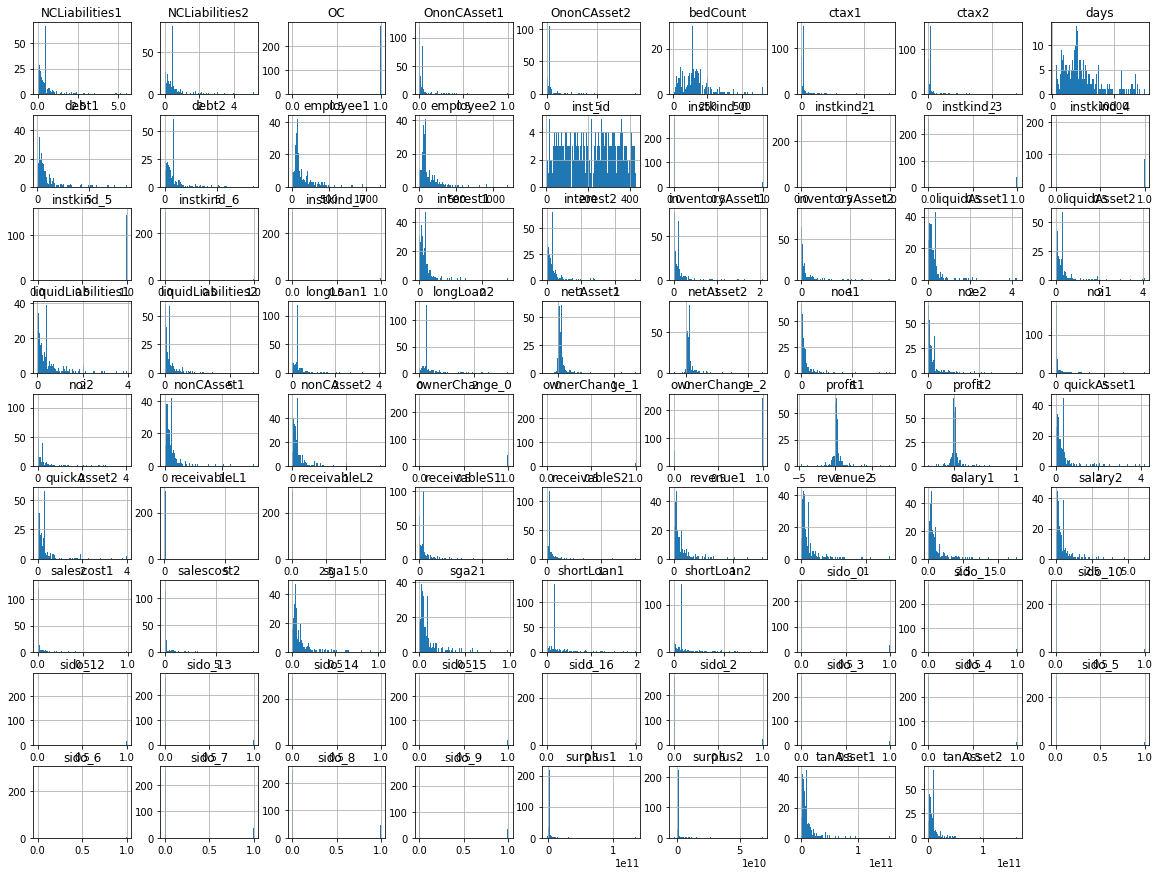

In [719]:
train2.hist(bins=100, figsize=(20,15))
plt.show()

In [720]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   inst_id             296 non-null    int64  
 1   OC                  296 non-null    int64  
 2   bedCount            296 non-null    float64
 3   revenue1            296 non-null    float64
 4   salescost1          296 non-null    float64
 5   sga1                296 non-null    float64
 6   salary1             296 non-null    float64
 7   noi1                296 non-null    float64
 8   noe1                296 non-null    float64
 9   interest1           296 non-null    float64
 10  ctax1               296 non-null    float64
 11  profit1             296 non-null    float64
 12  liquidAsset1        296 non-null    float64
 13  quickAsset1         296 non-null    float64
 14  receivableS1        296 non-null    float64
 15  inventoryAsset1     296 non-null    float64
 16  nonCAsse

In [721]:
train2.tail()

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_5,sido_6,sido_7,sido_8,sido_9,sido_10,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_1,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
291,418,1,109.0,4.303270e+09,2.423876e+08,3.455912e+09,2.228914e+09,3840153.0,2.678230e+08,86869777.0,7.760281e+07,3.409870e+08,4.508958e+08,4.444234e+08,3.775848e+08,6472303.0,7.470236e+09,7.323860e+09,5.471640e+07,2.491294e+05,4.942362e+09,2.905427e+09,1.731667e+09,2.036935e+09,2.020000e+09,2.978770e+09,1.231924e+09,3.919676e+09,1.950452e+08,3.214299e+09,1.983768e+09,1173653.0,3.033400e+08,152320714.0,6.758503e+07,2.081659e+08,2.493244e+08,2.378112e+08,2.286310e+08,11513142.0,7.451033e+09,7.316858e+09,4.251640e+07,2.204132e+05,5.062574e+09,3.092828e+09,1.486493e+09,1.969747e+09,1.925500e+09,2.637783e+09,9.475288e+08,75.0,70.0,2485,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
292,419,1,367.0,1.207963e+10,5.309241e+08,9.521440e+09,5.691328e+09,49773739.0,1.151424e+09,202882821.0,4.468110e+08,4.788074e+08,3.424591e+09,3.366408e+09,2.508610e+09,58183039.0,1.421666e+10,1.409360e+10,1.055250e+08,2.491294e+05,8.097221e+09,6.926221e+09,1.731667e+09,1.170000e+09,2.603900e+09,9.544034e+09,1.231924e+09,1.086845e+10,5.650371e+08,8.828640e+09,5.327680e+09,59729148.0,4.978541e+08,190412606.0,6.758503e+07,1.036651e+09,3.312727e+09,3.280679e+09,1.781293e+09,32047864.0,1.294379e+10,1.286136e+10,6.205000e+07,2.204132e+05,7.191291e+09,1.101291e+09,2.813239e+08,6.090000e+09,5.890000e+09,9.065227e+09,9.475288e+08,180.0,180.0,2979,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
293,420,1,136.5,5.500472e+09,1.963479e+09,4.883855e+09,2.653680e+09,62681034.0,3.831812e+08,53451647.0,5.042223e+07,2.456945e+08,3.772364e+09,3.757178e+09,1.031964e+09,15186803.0,5.289836e+09,5.287754e+09,3.348935e+08,2.491294e+05,4.478687e+09,9.577579e+08,1.731667e+09,3.520929e+09,1.800000e+09,4.583514e+09,1.231924e+09,5.555753e+09,1.809869e+09,4.936089e+09,2.618681e+09,66944448.0,3.884921e+08,54236956.0,5.147631e+07,2.466403e+08,2.997165e+09,2.980013e+09,7.571317e+08,17152386.0,5.285997e+09,5.282917e+09,3.181561e+08,2.204132e+05,3.945343e+09,7.113988e+08,1.486493e+09,3.233945e+09,1.800000e+09,4.337819e+09,9.475288e+08,62.0,66.0,2779,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
294,422,1,214.0,7.614697e+09,4.153475e+08,5.903119e+09,3.467861e+09,42098974.0,7.439421e+08,187576102.0,7.760281e+07,5.943868e+08,2.776603e+09,2.769516e+09,1.797116e+09,7086391.0,1.191266e+10,1.171868e+10,1.198567e+08,2.491294e+05,8.715369e+09,1.520004e+09,1.731667e+09,7.195366e+09,5.930000e+09,5.973889e+09,1.406028e+09,7.068816e+09,4.057855e+08,6.755147e+09,3.768952e+09,90318167.0,2.090078e+08,196659822.0,5.160864e+07,-2.624151e+08,2.550562e+09,2.542336e+09,1.962693e+09,8225698.0,1.225271e+10,1.210466e+10,7.685672e+07,2.204132e+05,9.423771e+09,2.618201e+09,1.486493e+09,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,5071,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
295,427,0,180.0,2.116892e+09,2.681748e+08,3.286245e+09,2.231944e+09,123665065.0,5.366919e+08,514368798.0,7.760281e+07,-1.850554e+09,4.929370e+09,4.910840e+09,2.834734e+07,18529330.0,1.196624e+10,4.441451e+09,3.348935e+08,7.374231e+07,5.804268e+08,7.507060e+09,1.731667e+09,4.515262e+09,2.603900e+09,5.839519e+09,1.231924e+09,4.096872e+09,4.861985e+08,4.750651e+09,2.896997e+09,10545075.0,1.600243e+09,746156653.0,6.758503e+07,-2.729675e+0

### 2 - 9) $ log함수로 값 고르게 분포 시키기

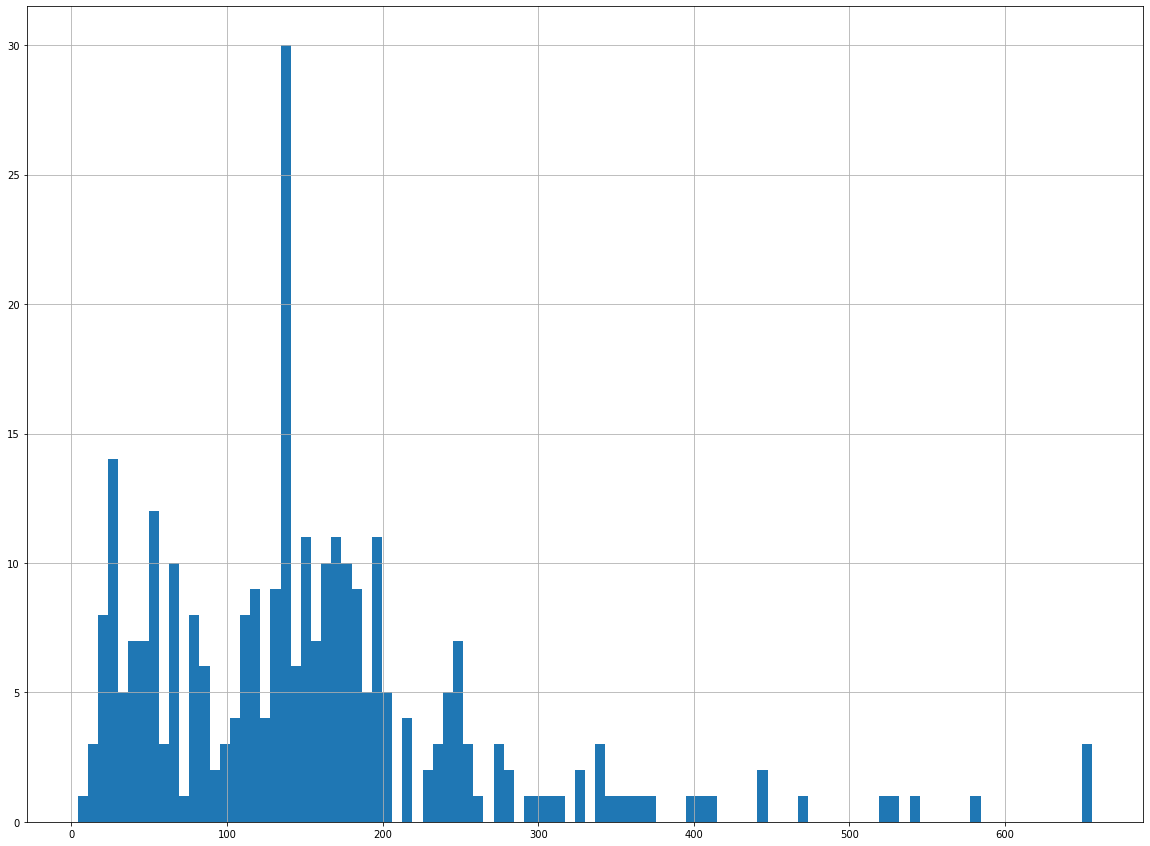

In [722]:
train2['bedCount'].hist(bins=100, figsize=(20,15))
plt.show()

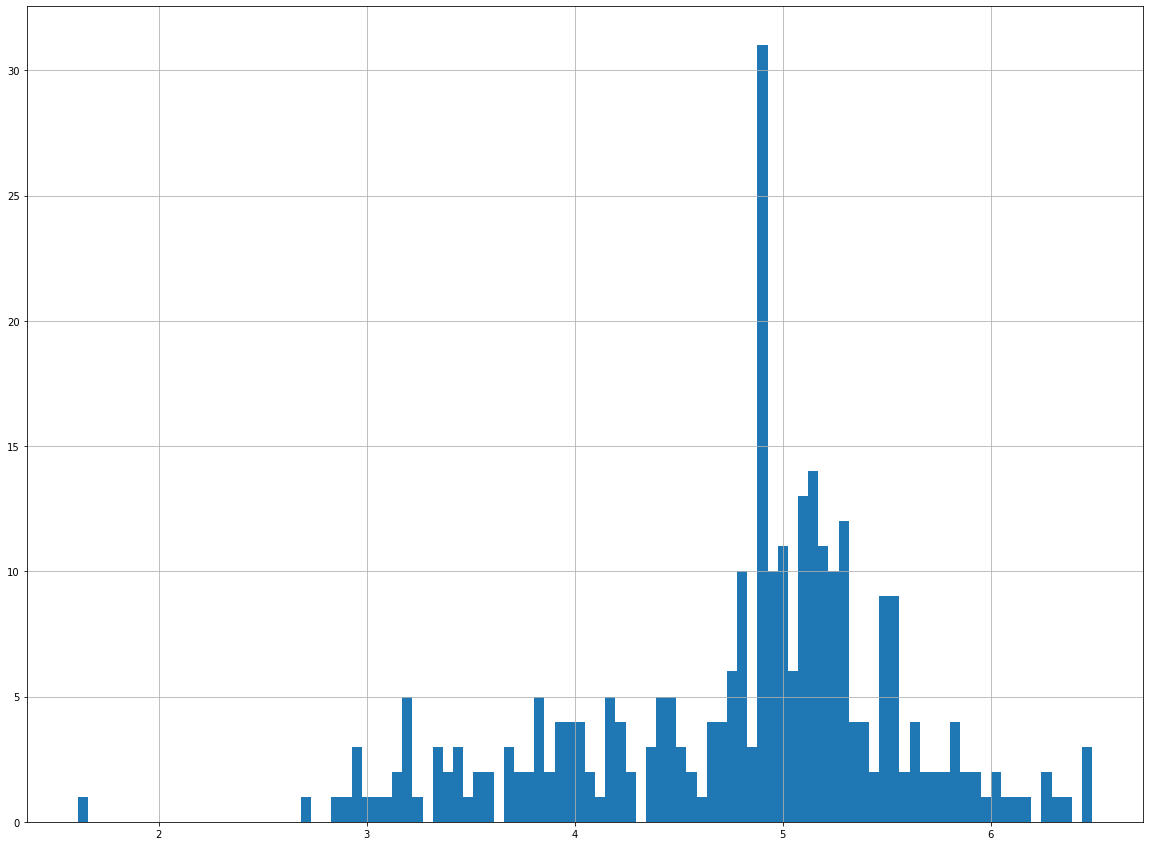

In [723]:
log_train2 = np.log1p(train2['bedCount'])
log_train2.hist(bins=100, figsize=(20,15))
plt.show()

In [724]:
box_train2 = stats.boxcox(train2['bedCount'])
box_train20 = pd.Series(box_train2[0])
box_train20

0      13.101424
1      18.151344
2      19.066246
3      17.161628
4      13.697437
         ...    
291    10.831246
292    17.414275
293    11.867498
294    14.174519
295    13.247580
Length: 296, dtype: float64

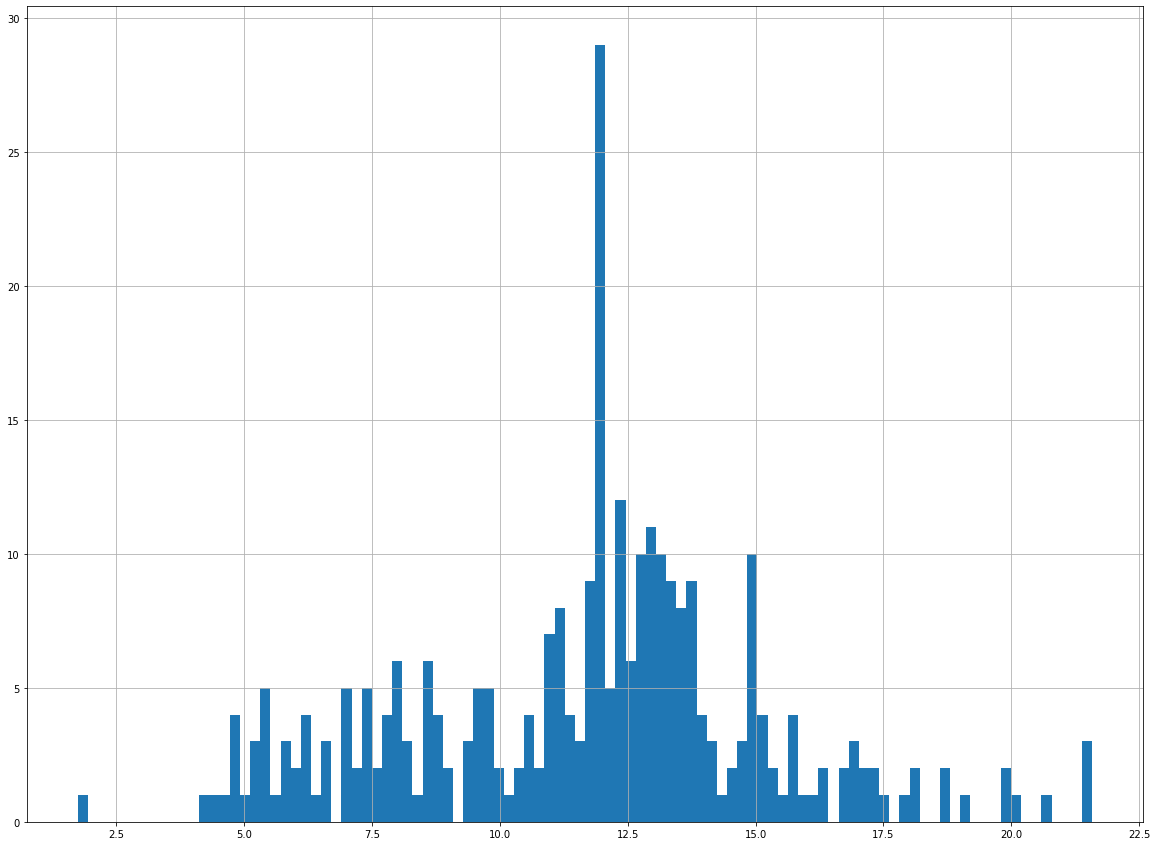

In [725]:
box_train20.hist(bins=100, figsize=(20,15))
plt.show()

In [726]:
train2['bedCount']

0      175.0
1      410.0
2      468.0
3      353.0
4      196.0
       ...  
291    109.0
292    367.0
293    136.5
294    214.0
295    180.0
Name: bedCount, Length: 296, dtype: float64

결과 => boxcox로 값을 분포시킨게 정규 분포가 가장 고르다!

In [ ]:
stats.boxcox(train2['bedCount'],train2['revenue1'],train2['salescost1'])
stats.boxcox(train2['salary1'],train2['noi1'],train2['noe1'])
stats.boxcox(train2['interest1'],train2['ctax1'],train2['profit1'])
stats.boxcox(train2['liquidAsset1'],train2['quickAsset1'],train2['receivableS1'])
stats.boxcox(train2['inventoryAsset1'],train2['nonCAsset1'],train2['tanAsset1'])
stats.boxcox(train2['OnonCAsset1'],train2['receivableL1'],train2['debt1'])
stats.boxcox(train2['liquidLiabilities1'],train2['shortLoan1'],train2['NCLiabilities1'])
stats.boxcox(train2['longLoan1'],train2['netAsset1'],train2['surplus1'])
stats.boxcox(train2['revenue2'],train2['salescost2'],train2['sga2'])
stats.boxcox(train2['salary2'],train2['noi2'],train2['noe2'])
stats.boxcox(train2['interest2'],train2['ctax2'],train2['profit2'])
stats.boxcox(train2['liquidAsset2'],train2['quickAsset2'],train2['receivableS2'])
stats.boxcox(train2['inventoryAsset2'],train2['nonCAsset2'],train2['tanAsset2'])
stats.boxcox(train2['OnonCAsset2'],train2['receivableL2'],train2['debt2'])
stats.boxcox(train2['liquidLiabilities2'],train2['shortLoan2'],train2['NCLiabilities2'])
stats.boxcox(train2['longLoan2'],train2['netAsset2'],train2['surplus2'])
stats.boxcox(train2['employee1'],train2['employee2'],train2['days'])
stats.boxcox(train2['sga1'])

In [ ]:
box_train2 = stats.boxcox(train2['bedCount'])
train2['bedCount'] = pd.Series(box_train2[0])
train2['bedCount']

In [ ]:
box_train2 = stats.boxcox(train2['revenue1'])
train2['revenue1'] = pd.Series(box_train2[0])
train2['revenue1']

In [749]:
box_train2 = stats.boxcox(train2['salescost1'])
train2['salescost1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salary1'])
train2['salary1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noi1'])
train2['noi1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noe1'])
train2['noe1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['interest1'])
train2['interest1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['ctax1'])
train2['ctax1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['profit1'])     # = 음수값이 있어 박스코스로 분포시키가 어려워서 제거
#train2['profit1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidAsset1'])
train2['liquidAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['quickAsset1'])
train2['quickAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['receivableS1'])
train2['receivableS1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['inventoryAsset1'])
train2['inventoryAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['nonCAsset1'])
train2['nonCAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['tanAsset1'])
train2['tanAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['OnonCAsset1'])
train2['OnonCAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['receivableL1'])
#train2['receivableL1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['debt1'])
train2['debt1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidLiabilities1'])
train2['liquidLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['shortLoan1'])
train2['shortLoan1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['NCLiabilities1'])
train2['NCLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['longLoan1'])
train2['longLoan1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['netAsset1'])
#train2['netAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['surplus1'])
#train2['surplus1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['revenue2'])
train2['revenue2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salescost2'])
train2['salescost2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['sga2'])
train2['sga2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['salary2'])
train2['salary2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noi2'])
train2['noi2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['noe2'])
train2['noe2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['interest2'])
train2['interest2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['ctax2'])
train2['ctax2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['profit2'])
#train2['profit2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidAsset2'])
train2['liquidAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['quickAsset2'])
train2['quickAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['receivableS2'])
train2['receivableS2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['inventoryAsset2'])
train2['inventoryAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['nonCAsset2'])
train2['nonCAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['tanAsset2'])
train2['tanAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['OnonCAsset2'])
train2['OnonCAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['receivableL2'])
#train2['receivableL2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['debt2'])
train2['debt2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['liquidLiabilities2'])
train2['liquidLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['shortLoan2'])
train2['shortLoan2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['NCLiabilities2'])
train2['NCLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['longLoan2'])
train2['longLoan2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['netAsset2'])
#train2['netAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(train2['surplus2'])
#train2['surplus2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['employee1'])
train2['employee1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['employee2'])
train2['employee2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['days'])
train2['days'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(train2['sga1'])
train2['sga1'] = pd.Series(box_train2[0])

## profit1, receivableL1, netAsset1, surplus1, profit2, receivableL2, netAsset2, surplus2 => 음수값으로 인해 boxcox가 적용이 안돼서 제거

In [754]:
train3 = train2.drop(['profit1','receivableL1', 'netAsset1', 'surplus1', 'profit2', 'receivableL2', 'netAsset2'], axis = 1 )
train3 = train3.drop('surplus2', axis = 1 )

In [755]:
train3

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_5,sido_6,sido_7,sido_8,sido_9,sido_10,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_1,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,1,1,11.922865,62.949834,28.442678,100.725027,6.434428,37.301015,66.119178,217.262165,143.766686,105.693993,104.444252,790.531092,28.565585,115.191260,87.099598,80.328226,110.207329,77.248641,974.949331,587.546286,142.673510,125.630447,37.515017,243.229595,56.917565,68.553498,71.740639,205.945130,116.034708,105.005686,105.527167,933.382990,34.972299,86.803713,31.650485,95.155621,96.167768,126.488093,962.792752,883.418253,316.227155,5.694194,6.329237,21.756557,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,1,16.858585,70.070410,28.442678,113.246426,7.115080,59.413275,126.896367,430.723666,177.209564,127.066966,125.123916,876.478732,37.352474,143.068177,105.832999,91.936409,161.967062,120.465956,974.949331,1035.882625,202.305820,144.110825,37.515017,280.183815,62.312858,105.367454,113.656380,367.825639,149.824699,127.373732,127.710963,969.601558,44.961294,103.059922,34.923208,107.726751,133.100941,203.603316,962.792752,1575.186635,480.507790,11.437029,13.512823,25.730631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,4,1,17.751465,54.602367,24.394472,76.558836,5.087412,11.080735,13.619149,430.723666,177.209564,86.468042,84.747928,258.459554,29.455652,72.782453,57.670242,91.936409,80.482451,68.696044,974.949331,1035.882625,202.305820,144.110825,37.515017,280.183815,62.312858,105.367454,113.656380,367.825639,149.824699,127.373732,127.710963,969.601558,44.961294,103.059922,34.923208,107.726751,133.100941,203.603316,962.792752,1575.186635,480.507790,8.403128,0.000000,13.933526,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,7,1,15.892270,82.710033,28.442678,143.451230,8.244431,65.525890,148.979821,694.098535,212.997339,154.157938,149.811254,876.478732,50.940358,173.237048,125.189898,134.467059,205.083068,156.759145,1850.260982,1387.316150,241.214356,183.231399,37.515017,394.439816,74.583644,119.380771,130.328834,596.388508,188.901477,152.247810,151.014698,969.601558,59.735390,121.288360,38.152586,159.367667,164.131931,260.955040,1557.027126,2408.566869,699.290258,10.934060,12.800308,24.695930,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,9,1,12.506125,79.712839,28.442678,136.744247,8.077554,51.894637,152.091299,709.745228,177.209564,138.714830,135.813354,1423.894369,44.135936,173.511508,127.150195,86.160241,210.082774,157.462067,1800.771044,1526.220501,268.185406,175.197196,37.515017,373.127025,72.859640,123.772387,132.680898,604.314568,149.824699,135.570594,134.848063,1567.538754,53.181322,123.659243,38.839470,124.289974,171.083991,286.568230,1845.538862,2428.194906,689.102233,8.119424,9.085769,22.818230,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,9.699139,63.074059,22.227430,99.030242,6.496847,28.756560,113.358964,355.369272,177.209564,93.454621,92.387196,744.704961,25.332852,134.936539,101.151178,68.666527,148.987315,114.000380,974.949331,847.047644,193.627400,124.026508,30.901484,233.470308,56.683387,43.378690,103.514004,357.770785,149.824699,88.020376,88.003881,740.465151,34.237516,99.087274,34.294433,77.96024

### 2 - 10) test데이터에 적용

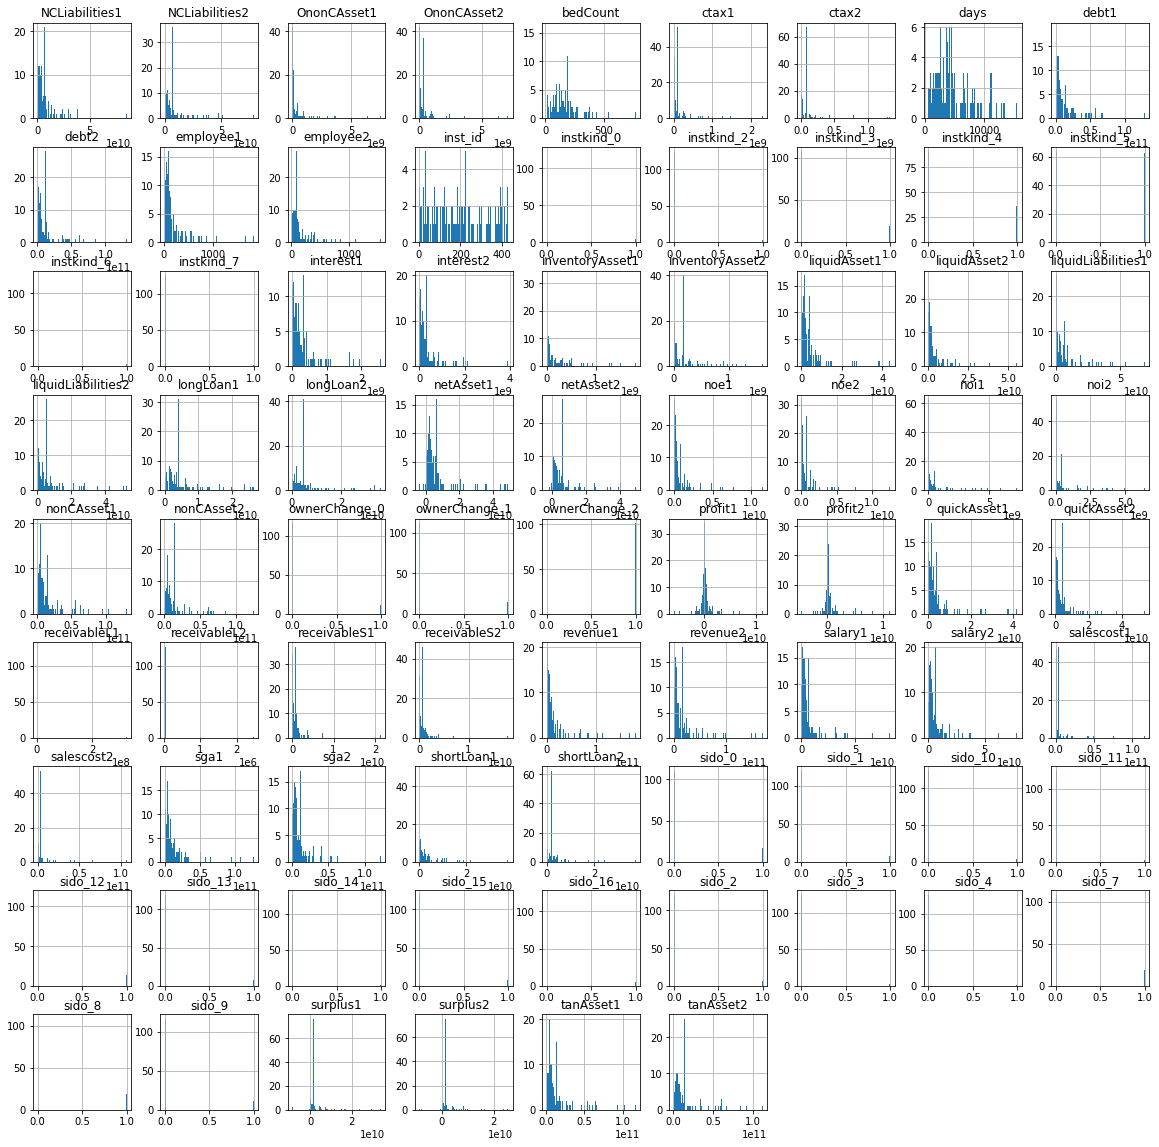

In [393]:
test2.hist(bins=100, figsize=(20,20))
plt.show()

In [756]:
stats.boxcox(test2['bedCount'],test2['revenue1'],test2['salescost1'])
stats.boxcox(test2['salary1'],test2['noi1'],test2['noe1'])
stats.boxcox(test2['interest1'],test2['ctax1'],test2['profit1'])
stats.boxcox(test2['liquidAsset1'],test2['quickAsset1'],test2['receivableS1'])
stats.boxcox(test2['inventoryAsset1'],test2['nonCAsset1'],test2['tanAsset1'])
stats.boxcox(test2['OnonCAsset1'],test2['receivableL1'],test2['debt1'])
stats.boxcox(test2['liquidLiabilities1'],test2['shortLoan1'],test2['NCLiabilities1'])
stats.boxcox(test2['longLoan1'],test2['netAsset1'],test2['surplus1'])
stats.boxcox(test2['revenue2'],test2['salescost2'],test2['sga2'])
stats.boxcox(test2['salary2'],test2['noi2'],test2['noe2'])
stats.boxcox(test2['interest2'],test2['ctax2'],test2['profit2'])
stats.boxcox(test2['liquidAsset2'],test2['quickAsset2'],test2['receivableS2'])
stats.boxcox(test2['inventoryAsset2'],test2['nonCAsset2'],test2['tanAsset2'])
stats.boxcox(test2['OnonCAsset2'],test2['receivableL2'],test2['debt2'])
stats.boxcox(test2['liquidLiabilities2'],test2['shortLoan2'],test2['NCLiabilities2'])
stats.boxcox(test2['longLoan2'],test2['netAsset2'],test2['surplus2'])
stats.boxcox(test2['employee1'],test2['employee2'],test2['days'])
stats.boxcox(test2['sga1'])

(array([1154.15339756,  986.62081817,  913.27100081,  805.60080249,
        1078.76914161,  963.1012723 , 1137.45770292,  968.48178309,
         531.34161777, 1094.37253032, 1094.37253032,  710.55404428,
        1337.79235389,  709.00701572, 1292.8142283 ,  805.60080249,
         649.39340189,  828.19303884,  843.68223157,  995.53643117,
         769.02018087,  822.75066444,  587.94241752,  589.21044831,
         809.66458434,  713.56800234, 1136.02823544,  895.69540785,
         878.52759475,  655.02568089,  568.01436996,  709.86742044,
         972.52202196,  794.41407945,  651.6235478 ,  649.88367694,
         731.01997577,  732.1253095 ,  629.48004709,  668.77714997,
         617.82191565,  644.28929792,  729.49036907,  875.43386549,
         953.85263896,  897.59108628,  572.31196681,  479.02525421,
         850.45771235,  731.04817605,  913.99799826,  754.01637102,
         494.91711556,  644.75067598,  662.87561111,  495.30727687,
         805.60080249,  627.68776241,  677.89225

In [758]:
box_train2 = stats.boxcox(test2['bedCount'])
test2['bedCount'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['revenue1'])
test2['revenue1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salescost1'])
test2['salescost1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salary1'])
test2['salary1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noi1'])
test2['noi1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noe1'])
test2['noe1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['interest1'])
test2['interest1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['ctax1'])
test2['ctax1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['profit1'])     # = 음수값이 있어 박스코스로 분포시키가 어려워서 제거
#test2['profit1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidAsset1'])
test2['liquidAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['quickAsset1'])
test2['quickAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['receivableS1'])
test2['receivableS1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['inventoryAsset1'])
test2['inventoryAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['nonCAsset1'])
test2['nonCAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['tanAsset1'])
test2['tanAsset1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['OnonCAsset1'])
test2['OnonCAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['receivableL1'])
#test2['receivableL1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['debt1'])
test2['debt1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidLiabilities1'])
test2['liquidLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['shortLoan1'])
test2['shortLoan1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['NCLiabilities1'])
test2['NCLiabilities1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['longLoan1'])
test2['longLoan1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['netAsset1'])
#test2['netAsset1'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['surplus1'])
#test2['surplus1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['revenue2'])
test2['revenue2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salescost2'])
test2['salescost2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['sga2'])
test2['sga2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['salary2'])
test2['salary2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noi2'])
test2['noi2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['noe2'])
test2['noe2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['interest2'])
test2['interest2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['ctax2'])
test2['ctax2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['profit2'])
#test2['profit2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidAsset2'])
test2['liquidAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['quickAsset2'])
test2['quickAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['receivableS2'])
test2['receivableS2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['inventoryAsset2'])
test2['inventoryAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['nonCAsset2'])
test2['nonCAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['tanAsset2'])
test2['tanAsset2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['OnonCAsset2'])
test2['OnonCAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['receivableL2'])
#test2['receivableL2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['debt2'])
test2['debt2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['liquidLiabilities2'])
test2['liquidLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['shortLoan2'])
test2['shortLoan2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['NCLiabilities2'])
test2['NCLiabilities2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['longLoan2'])
test2['longLoan2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['netAsset2'])
#test2['netAsset2'] = pd.Series(box_train2[0])
#box_train2 = stats.boxcox(test2['surplus2'])
#test2['surplus2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['employee1'])
test2['employee1'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['employee2'])
test2['employee2'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['days'])
test2['days'] = pd.Series(box_train2[0])
box_train2 = stats.boxcox(test2['sga1'])
test2['sga1'] = pd.Series(box_train2[0])

In [759]:
test3 = test2.drop(['profit1','receivableL1', 'netAsset1', 'surplus1', 'profit2', 'receivableL2', 'netAsset2'], axis = 1 )
test3 = test3.drop('surplus2', axis = 1 )

In [760]:
test3

,inst_id,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_7,sido_8,sido_9,sido_10,sido_11,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_2,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,2,23.034664,224.665703,74.679712,1154.153398,50.822849,59.886938,107.963911,74.751442,79.666663,85.682026,80.139012,501.814701,343.419601,7.897429,7.833229,59.321149,238.780371,82.081045,158.868030,375.117299,333.805072,76.116958,75.740940,34.873100,45.477253,141.897274,74.464268,96.846637,269.708577,62.979537,35.848192,723.014418,310.002228,8.736598,8.140028,78.426236,144.445776,160.080666,253.597270,167.033974,156.167341,3.884100,3.809414,31.107067,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,5,9.115818,204.635461,74.679712,986.620818,48.367527,39.749694,96.235498,75.492153,84.390012,73.511208,68.875510,491.109966,272.256412,7.920132,7.851520,33.221976,238.036376,80.114910,148.973502,417.953377,402.006476,72.543390,75.740940,33.963264,44.018936,91.115796,73.205210,99.968692,217.322525,55.132048,32.569487,429.746141,261.543070,8.761603,8.163443,47.077561,147.952430,156.287594,237.318529,214.811528,190.658898,3.682843,3.609969,17.836489,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,6,22.174562,192.937485,71.281834,913.271001,47.064471,54.457093,91.899525,68.322097,84.390012,79.607530,74.252973,865.840807,333.082045,7.871066,7.807351,49.366142,187.591336,77.117001,147.697911,329.542411,308.524066,69.802879,68.824642,33.052015,42.586115,93.940782,65.555464,85.831855,151.483073,59.700014,34.514391,1113.696234,287.788711,8.701788,8.112830,72.629121,119.115460,148.097287,233.544823,174.847683,154.769406,3.154991,3.038372,34.565283,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,8,25.115611,185.845088,74.679712,805.600802,45.390595,60.557813,96.722183,61.155738,84.390012,76.536058,71.600039,522.111524,297.325118,7.914660,7.849551,55.429241,210.702492,76.500180,144.783946,282.198532,308.524066,67.218045,75.740940,31.784820,40.782312,146.000131,68.933886,78.516802,217.322525,59.090738,34.272837,622.042007,279.746569,8.723856,8.128709,70.705824,119.620763,128.900438,181.053071,152.272771,154.769406,3.913035,3.836983,24.799763,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,10,19.682863,215.704223,74.679712,1078.769142,49.542803,54.230600,86.437563,77.972640,84.390012,75.775176,70.880693,321.593065,293.881460,7.912166,7.846454,70.077689,227.856727,76.209515,143.151027,418.032684,363.363366,73.525509,75.740940,34.057656,43.975842,126.208941,61.803217,108.950113,217.322525,57.504182,33.525334,444.301777,292.441026,8.756232,8.158665,74.856577,140.377484,124.958164,174.003517,226.950779,194.993407,3.732276,3.622441,28.488667,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,424,15.992223,191.802027,63.220423,868.958029,47.255311,47.799574,91.234697,63.281502,102.193142,82.681766,77.836785,738.378888,199.898626,7.823800,7.761547,53.978021,192.767245,71.448155,112.988436,283.826272,308.524066,69.180716,64.610170,32.546241,42.449769,104.314780,66.774301,84.804906,329.391195,60.928258,35.143207,907.914765,171.773822,8.631523,8.056613,69.756529,123.482301,134.022090,162.683959,153.945018,154.769406,3.815465,3.038372,29.821900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [765]:
train3

,inst_id,OC,bedCount,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,employee1,employee2,days,sido_0,sido_1,sido_2,sido_3,sido_4,sido_5,sido_6,sido_7,sido_8,sido_9,sido_10,sido_12,sido_13,sido_14,sido_15,sido_16,instkind_0,instkind_1,instkind_3,instkind_4,instkind_5,instkind_6,instkind_7,ownerChange_0,ownerChange_1,ownerChange_2
0,1,1,11.922865,62.949834,28.442678,100.725027,6.434428,37.301015,66.119178,217.262165,143.766686,105.693993,104.444252,790.531092,28.565585,115.191260,87.099598,80.328226,110.207329,77.248641,974.949331,587.546286,142.673510,125.630447,37.515017,243.229595,56.917565,68.553498,71.740639,205.945130,116.034708,105.005686,105.527167,933.382990,34.972299,86.803713,31.650485,95.155621,96.167768,126.488093,962.792752,883.418253,316.227155,5.694194,6.329237,21.756557,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,3,1,16.858585,70.070410,28.442678,113.246426,7.115080,59.413275,126.896367,430.723666,177.209564,127.066966,125.123916,876.478732,37.352474,143.068177,105.832999,91.936409,161.967062,120.465956,974.949331,1035.882625,202.305820,144.110825,37.515017,280.183815,62.312858,105.367454,113.656380,367.825639,149.824699,127.373732,127.710963,969.601558,44.961294,103.059922,34.923208,107.726751,133.100941,203.603316,962.792752,1575.186635,480.507790,11.437029,13.512823,25.730631,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,4,1,17.751465,54.602367,24.394472,76.558836,5.087412,11.080735,13.619149,430.723666,177.209564,86.468042,84.747928,258.459554,29.455652,72.782453,57.670242,91.936409,80.482451,68.696044,974.949331,1035.882625,202.305820,144.110825,37.515017,280.183815,62.312858,105.367454,113.656380,367.825639,149.824699,127.373732,127.710963,969.601558,44.961294,103.059922,34.923208,107.726751,133.100941,203.603316,962.792752,1575.186635,480.507790,8.403128,0.000000,13.933526,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,7,1,15.892270,82.710033,28.442678,143.451230,8.244431,65.525890,148.979821,694.098535,212.997339,154.157938,149.811254,876.478732,50.940358,173.237048,125.189898,134.467059,205.083068,156.759145,1850.260982,1387.316150,241.214356,183.231399,37.515017,394.439816,74.583644,119.380771,130.328834,596.388508,188.901477,152.247810,151.014698,969.601558,59.735390,121.288360,38.152586,159.367667,164.131931,260.955040,1557.027126,2408.566869,699.290258,10.934060,12.800308,24.695930,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,9,1,12.506125,79.712839,28.442678,136.744247,8.077554,51.894637,152.091299,709.745228,177.209564,138.714830,135.813354,1423.894369,44.135936,173.511508,127.150195,86.160241,210.082774,157.462067,1800.771044,1526.220501,268.185406,175.197196,37.515017,373.127025,72.859640,123.772387,132.680898,604.314568,149.824699,135.570594,134.848063,1567.538754,53.181322,123.659243,38.839470,124.289974,171.083991,286.568230,1845.538862,2428.194906,689.102233,8.119424,9.085769,22.818230,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,418,1,9.699139,63.074059,22.227430,99.030242,6.496847,28.756560,113.358964,355.369272,177.209564,93.454621,92.387196,744.704961,25.332852,134.936539,101.151178,68.666527,148.987315,114.000380,974.949331,847.047644,193.627400,124.026508,30.901484,233.470308,56.683387,43.378690,103.514004,357.770785,149.824699,88.020376,88.003881,740.465151,34.237516,99.087274,34.294433,77.96024

In [769]:
train4_x = train3.drop('OC', axis = 1)

In [770]:
train4_y = train3['OC']

In [771]:
train4_y

0      1
1      1
2      1
3      1
4      1
      ..
291    1
292    1
293    1
294    1
295    0
Name: OC, Length: 296, dtype: int64

In [772]:
train4_x = stats.zscore(train4_x)

In [773]:
train4_y = stats.zscore(train4_y)

In [775]:
model = Sequential()
model.add( Dense( 1, input_dim = 71, activation = 'sigmoid' ) )   # 로지스틱은 시그모이드를 사용, 선형은 linear
sgd = optimizers.SGD( lr = 0.001 )
model.compile( optimizer = sgd, loss = 'binary_crossentropy',    # 로지스틱은 loss = 'binary_crossentropy', 선형은 loss = MSE
               metrics = ['binary_accuracy'] )
hist = model.fit(train4_x, train4_y, batch_size = 1, epochs = 200, shuffle = False )

Epoch 1/200
296/296 [==============================] - 0s 1ms/step - loss: 0.9205 - binary_accuracy: 0.0000e+00
Epoch 2/200
296/296 [==============================] - 0s 1ms/step - loss: 0.7293 - binary_accuracy: 0.0000e+00
Epoch 3/200
296/296 [==============================] - 0s 1ms/step - loss: 0.5673 - binary_accuracy: 0.0000e+00
Epoch 4/200
296/296 [==============================] - 0s 1ms/step - loss: 0.4288 - binary_accuracy: 0.0000e+00
Epoch 5/200
296/296 [==============================] - 0s 1ms/step - loss: 0.3079 - binary_accuracy: 0.0000e+00
Epoch 6/200
296/296 [==============================] - 0s 1ms/step - loss: 0.1999 - binary_accuracy: 0.0000e+00
Epoch 7/200
296/296 [==============================] - 0s 1ms/step - loss: 0.1013 - binary_accuracy: 0.0000e+00
Epoch 8/200
296/296 [==============================] - 0s 1ms/step - loss: 0.0098 - binary_accuracy: 0.0000e+00
Epoch 9/200
296/296 [==============================] - 0s 982us/step - loss: -0.0762 - binary_accuracy: 

In [764]:
train3_a

array([[-1.80080186,  0.1964599 ,  0.40796981, ..., -0.40097919,
        -0.1964599 ,  0.46164354],
       [-1.78413794,  0.1964599 ,  1.8463425 , ..., -0.40097919,
        -0.1964599 ,  0.46164354],
       [-1.77580597,  0.1964599 ,  2.1065463 , ..., -0.40097919,
        -0.1964599 ,  0.46164354],
       ...,
       [ 1.69029076,  0.1964599 ,  0.05586333, ..., -0.40097919,
        -0.1964599 ,  0.46164354],
       [ 1.70695468,  0.1964599 ,  0.71395655, ..., -0.40097919,
        -0.1964599 ,  0.46164354],
       [ 1.7486145 , -5.09009734,  0.44965716, ..., -0.40097919,
         5.09009734, -2.16617351]])

In [ ]:
train3_a = stats.zscore(test3)

In [394]:
train.corr()

,inst_id,OC,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,days
inst_id,1.000000,-0.075528,-0.070896,-0.183211,-0.014125,-0.138278,-0.099088,-0.144937,-0.137086,0.028890,-0.085245,-0.351277,0.090892,0.150926,-0.034148,-0.029988,-0.109494,-0.139747,-0.180543,-0.199938,-0.182169,0.103634,-0.261613,-0.466401,-0.713925,-0.070364,-0.112598,0.021784,0.012778,-0.155439,-0.103115,-0.172280,-0.155943,0.050996,-0.017386,-0.351797,0.071714,0.098283,-0.023806,-0.016788,-0.044709,-0.145367,-0.193906,-0.208310,-0.230260,0.103634,-0.238352,-0.407655,-0.589398,-0.061105,-0.167524,-0.011228,-0.015479,-0.183599,-0.233871,-0.109310
OC,-0.075528,1.000000,-0.097455,-0.094166,0.002061,0.061107,0.038568,0.062520,0.052220,0.013052,0.017784,-0.043357,0.026917,0.010620,0.007656,0.005667,-0.036136,0.048598,0.014880,0.019363,0.058254,-0.296212,0.042121,0.023563,0.088720,0.038069,0.003404,0.000533,-0.001548,0.062267,0.041390,0.061807,0.055540,0.046078,-0.041002,-0.076951,0.004105,0.120738,-0.003296,-0.006673,0.019865,0.068000,0.045271,0.048838,0.059082,-0.296212,0.051585,0.025015,0.062592,0.053694,0.044198,0.031264,0.041207,0.012040,-0.005246,0.078950
sido,-0.070896,-0.097455,1.000000,0.091915,-0.171555,0.170299,0.074531,0.187993,0.175568,0.057154,0.092518,0.081664,0.121763,0.027304,0.213877,0.213032,0.071001,0.178905,0.182035,0.159203,0.106311,0.009200,0.177705,0.203832,0.115919,0.128743,0.096131,0.165643,0.130347,0.161324,0.076692,0.167469,0.162815,0.080528,0.165886,0.103702,0.131860,0.091436,0.191586,0.190370,0.030346,0.169343,0.171588,0.148821,0.111902,0.009200,0.197699,0.185147,0.141383,0.166925,0.090977,0.131397,0.140245,0.213647,0.196233,0.065849
bedCount,-0.183211,-0.094166,0.091915,1.000000,0.016884,0.323550,0.153096,0.358656,0.398360,0.197325,0.189791,0.251848,0.064494,0.049249,0.214104,0.215123,0.173948,0.141593,0.325331,0.349638,0.170418,0.014048,0.319642,0.348773,0.237994,0.256227,0.181298,0.204935,-0.042935,0.304063,0.162869,0.339806,0.365686,0.201584,0.165319,0.226126,0.045081,-0.012974,0.210905,0.211445,0.206710,0.126924,0.304211,0.328715,0.155373,0.014048,0.275885,0.285837,0.162805,0.221491,0.197539,0.240454,-0.015214,0.559816,0.529168,-0.016441
instkind,-0.014125,0.002061,-0.171555,0.016884,1.000000,-0.309514,-0.307618,-0.261534,-0.216210,-0.123253,-0.144227,-0.105912,-0.107524,-0.034834,-0.285710,-0.281931,-0.065648,-0.301013,-0.157578,-0.146752,-0.218465,0.034613,-0.230928,-0.249771,-0.103074,-0.171596,-0.078465,-0.121457,-0.039403,-0.308856,-0.308372,-0.264528,-0.217693,-0.198171,-0.164283,-0.129365,-0.159559,-0.065412,-0.285936,-0.281925,-0.089679,-0.294322,-0.154416,-0.145087,-0.202583,0.034613,-0.217881,-0.228112,-0.120050,-0.155089,-0.064623,-0.142508,-0.061423,-0.228270,-0.222924,-0.212925
revenue1,-0.138278,0.061107,0.170299,0.323550,-0.309514,1.000000,0.765888,0.948690,0.887381,0.487511,0.546004,0.393349,0.531674,0.192406,0.849942,0.843679,0.461774,0.798692,0.767127,0.722685,0.624377,-0.031473,0.786732,0.759199,0.350559,0.667391,0.307265,0.655791,0.332868,0.987569,0.772662,0.930620,0.872474,0.679345,0.667556,0.392859,0.573554,0.348306,0.830019,0.821832,0.407761,0.788272,0.744028,0.702873,0.596353,-0.031473,0.790608,0.671053,0.333478,0.706887,0.333920,0.673457,0.382028,0.847657,0.839651,0.282797
salescost1,-0.099088,0.038568,0.074531,0.153096,-0.307618,0.765888,1.000000,0.532329,0.444699,0.294075,0.314024,0.066173,0.277043,0.042365,0.650806,0.649857,0.252101,0.518994,0.423485,0.385793,0.492041,-0.013772,0.455410,0.467063,0.152356,0.365504,0.060778,

In [395]:
test.corr()

,inst_id,sido,bedCount,instkind,revenue1,salescost1,sga1,salary1,noi1,noe1,interest1,ctax1,profit1,liquidAsset1,quickAsset1,receivableS1,inventoryAsset1,nonCAsset1,tanAsset1,OnonCAsset1,receivableL1,debt1,liquidLiabilities1,shortLoan1,NCLiabilities1,longLoan1,netAsset1,surplus1,revenue2,salescost2,sga2,salary2,noi2,noe2,interest2,ctax2,profit2,liquidAsset2,quickAsset2,receivableS2,inventoryAsset2,nonCAsset2,tanAsset2,OnonCAsset2,receivableL2,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,days
inst_id,1.000000,-0.079033,-0.248088,0.267316,-0.337744,-0.185185,-0.374279,-0.356238,-0.320966,-0.219953,-0.416430,-0.139678,-0.110302,-0.324646,-0.317124,-0.206097,-0.410268,-0.467887,-0.476381,-0.149099,-0.015017,-0.464992,-0.548284,-0.647054,-0.314393,-0.264150,-0.296220,-0.174961,-0.324158,-0.180008,-0.359856,-0.345742,-0.308647,-0.237224,-0.375784,-0.062886,-0.070625,-0.307579,-0.301017,-0.185315,-0.423269,-0.422280,-0.434492,-0.119995,0.127480,-0.409233,-0.482876,-0.514555,-0.310532,-0.309086,-0.305842,-0.152555,-0.158842
sido,-0.079033,1.000000,-0.057459,-0.094883,-0.031042,-0.008978,-0.031924,-0.021306,0.076573,-0.021751,0.131948,-0.010984,-0.029754,0.018745,0.017542,0.005853,0.041332,0.009806,0.001512,0.031433,-0.011315,-0.001080,0.016625,0.083634,0.004151,0.007810,-0.002108,0.059787,-0.027940,-0.010596,-0.028712,-0.017866,-0.025903,-0.030668,0.123578,0.053025,-0.065583,0.002663,0.001337,-0.040319,0.034873,0.035883,0.030786,-0.008628,0.043736,0.020422,0.052478,0.126502,0.012364,0.006725,-0.000633,0.067049,-0.030308
bedCount,-0.248088,-0.057459,1.000000,0.049184,0.454992,0.423242,0.367671,0.291820,0.470779,0.460352,0.193343,0.337981,0.161150,0.447072,0.441309,0.264746,0.456479,0.515261,0.510705,0.146218,-0.122164,0.512540,0.426545,0.196997,0.517925,0.219539,0.416677,0.098115,0.460187,0.429474,0.355941,0.277374,0.457657,0.515087,0.164782,0.337654,0.316084,0.486754,0.483593,0.192507,0.446995,0.460883,0.451432,0.146823,-0.116560,0.462006,0.430866,0.126257,0.427219,0.223020,0.446782,0.071222,0.067044
instkind,0.267316,-0.094883,0.049184,1.000000,-0.374954,-0.374702,-0.290380,-0.259247,-0.272961,-0.175369,-0.195230,-0.205622,-0.221787,-0.364767,-0.356912,-0.050348,-0.465478,-0.316645,-0.294941,-0.307439,-0.022355,-0.338180,-0.393058,-0.289613,-0.234224,-0.177482,-0.259474,-0.269396,-0.371604,-0.373806,-0.287864,-0.253063,-0.325640,-0.194869,-0.173423,-0.214281,-0.249579,-0.351534,-0.344667,-0.091648,-0.477947,-0.293423,-0.271043,-0.285887,-0.335811,-0.297682,-0.389439,-0.274128,-0.194781,-0.153837,-0.293715,-0.275224,-0.416646
revenue1,-0.337744,-0.031042,0.454992,-0.374954,1.000000,0.775871,0.900612,0.853234,0.579267,0.636545,0.468318,0.764039,0.602924,0.887026,0.886059,0.395421,0.705231,0.797439,0.777112,0.545554,-0.039961,0.861610,0.823685,0.375253,0.730099,0.406879,0.692929,0.549810,0.995551,0.775424,0.902824,0.848204,0.743011,0.680116,0.464009,0.670681,0.655778,0.850289,0.847853,0.407642,0.783964,0.788599,0.764555,0.532520,-0.049351,0.845699,0.794917,0.311734,0.749766,0.579818,0.715633,0.519835,0.391781
salescost1,-0.185185,-0.008978,0.423242,-0.374702,0.775871,1.000000,0.430116,0.359986,0.512968,0.488692,0.138122,0.660912,0.413163,0.810689,0.809018,0.194255,0.657002,0.598783,0.551980,0.423938,-0.022888,0.702263,0.565801,0.110702,0.701526,0.229192,0.526167,0.284828,0.784102,0.999174,0.444047,0.362334,0.660584,0.656189,0.128337,0.680237,0.465836,0.841048,0.839825,0.204086,0.700002,0.577102,0.527334,0.437811,-0.025230,0.692466,0.631460,0.125069,0.624997,0.256394,0.555329,0.283932,0.318696
sga1,-0.374279,-0.031924,0.367671,-0.290380,0.900612,0.430116,1.000000,0.977418,0.483667,0.544703,0.592350,0.614950,0.534195,0.707603,0.706653,0.453492,0.571224,0.742351,0.746874,0.474529,-0.040228,0.763993,0.806834,0.476986,0.573739,0.434438,0.621590,0.578245,0.888195,0.429284,0.990554,0.967259,0.611628,0.500978,0.585922,0.474913,0.594651,0.639781,0.636629,0.468470,0.653895,0.744275,0.745088,0.446732,-0.054156,0.7